#  Détection de faux billets
***

Ce travail présente le processus conduit pour la conception d'un modèle analytique à l'attention de l'Organisation nationale de lutte contre le faux-monnayage (ONCFM). Ce modèle devra être capable d’identifier automatiquement les vrais billets des faux billets. Cette mission de conception a été abordée à partir del’analyse des données fournies. Au cours de cette étude, une régression linéaire a été utilisée pour remplir les valeurs manquantes. A l’issu de cette mission, un modèle final et précis sera présenté. 

Les étapes de ce travail se décomposent en trois parties. Tout d’abord, une préparation des données à partir de dimensions du billet et des  éléments qui le composent. Ensuite, une analyse en profondeur des données. Ainsi, la mise en place d’un algorithme pour bâtir le modèle final. Finalement, la validation empirique et la présentation des résultats. 

Ainsi, il s’agira au cours de ce travail, de mettre en exergue les différents processus mis en place pour aller de l’étude du jeu de données à l’utilisation d’une régression linéaire pour remplir les valeurs manquantes et élaborer enfin un modèle précis.


####  <font color='deepskyblue'> A) Préparation des données </a> </font>
- <font color='skyblue'> 1) Importation des données et écriture des fonctions</font>
- <font color='skyblue'> 2) Observation des données </font>
- <font color='skyblue'> 3) Régression linéaire</font>
    - <font color='mediumturquoise'> 1) Création du modèle </font>
    - <font color='mediumturquoise'> 2) Entrainement du modèle </font>
    - <font color='mediumturquoise'> 3) Aberrations du modèle </font>
    - <font color='mediumturquoise'> 4) Validation du modèle </font>
    - <font color='mediumturquoise'> 5) Evaluation et prédictions du modèle </font>

####  <font color='deepskyblue'> B) Analyse descriptive </a> </font>
- <font color='skyblue'> 1) Analyse univariée</font>
    - <font color='mediumturquoise'> 1) Proportion de vrai / faux </font>
    - <font color='mediumturquoise'> 2) Distribution des variables </font>
    - <font color='mediumturquoise'> 3) Statistiques sur les variables </font>
- <font color='skyblue'> 1) Analyse bivariée</font>
    - <font color='mediumturquoise'> 1) Vue d'ensemble </font>
    - <font color='mediumturquoise'> 2) Corrélations entre les variables </font>
    - <font color='mediumturquoise'> 3) Impact des variables sur l'authenticité </font>
####  <font color='deepskyblue'> C) Classification non supervisée </a> </font>
- <font color='skyblue'> 1) Classification ascendante hiérarchique</font>
- <font color='skyblue'> 2) Algorithme k-means</font>
- <font color='skyblue'> 3) Analyse en composante principale</font>
####  <font color='deepskyblue'> D) Classification supervisée </a> </font>
- <font color='skyblue'> 1) Régression logistique </font>
    - <font color='mediumturquoise'> 1) Création du modèle </font>
    - <font color='mediumturquoise'> 2) Validation du modèle </font>
    - <font color='mediumturquoise'> 3) Evaluation et prédictions du modèle </font>
- <font color='skyblue'> 2) Méthode des ensembles </font>
    - <font color='mediumturquoise'> 1) Arbre de décisions </font>
    - <font color='mediumturquoise'> 2) Random forest</font>
- <font color='skyblue'> 3) Régression logistique par pipeline</font>
####  <font color='deepskyblue'> E) Evaluation et test des modèles </a> </font>
- <font color='skyblue'> 1) Méthode des validations croisées
- <font color='skyblue'> 2) Test de l'échantillon témoin </font>
- <font color='skyblue'> 3) Conclusion</font>



# <a name="C4"> A) Préparation des données </a>
***

## <font color='skyblue'> 1) Importation des données et écriture des fonctions </font>


- #### Importation des librairies courantes

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import scipy
from scipy import stats as st
from scipy.stats import shapiro, t
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.stattools import durbin_watson

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, roc_curve, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid", palette="Greens")

- #### Importation du fichier de données de l'ONCFM

In [2]:
billets0 = pd.read_csv('billets.csv', sep=';', encoding='utf-8')

- #### Ecriture des fonctions


Fonction sous forme de tableau qui affiche les colonnes, les valeurs non nulles, les valeurs uniques, le type de données, le nombre de valeurs nulles.

In [3]:
def info_donnee(df: pd.DataFrame):
    desc = df.columns.to_frame(name="colonne").set_index('colonne')
    desc['nombre de valeurs non nulles'] = df.notnull().sum() 
    desc['nombre de valeurs uniques'] = df.nunique() 
    desc['type de donnée'] = df.dtypes 
    desc['nombre de valeurs nulles']=df.isna().sum()
    return desc

Fonction sous forme de tableau qui affiche le nombre de valeurs uniques, la moyenne, la médiane, l'écart type, la valeur min, la valeur max, le 1e et 3e quartile.

In [4]:
#fonction qui prend le dataframe et le nom de la colonne comme paramètres
def info_variable(df,col):
    sum_table = pd.DataFrame()
    sum_table["Nombre de valeurs uniques"] = [df[col].nunique()]
    sum_table["Moyenne"] = [df[col].mean()]
    sum_table["Médiane"] = [df[col].median()]
    sum_table["Écart type"] = [df[col].std()]
    sum_table["Valeur min"] = [df[col].min()]
    sum_table["Valeur max"] = [df[col].max()]
    sum_table["Premier quartile"] = [df[col].quantile(0.25)]  
    sum_table["Troisième quartile"] = [df[col].quantile(0.75)]     
  
    return sum_table

Fonction qui affiche un cercle de corrélation PCA.

In [5]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    
    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(5, 5))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

Fonction qui affiche un graphique de corrélation avec les individus projetés.

In [6]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    #plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                    c=c, cmap="Blues", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='10', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

Fonction qui permet de trier les variables significatives et non significatives en vu d'une régression logistique.

In [7]:
def regression_logistique(X_training, y_training, X_test, alpha=0.05, drop_non_significant=True):
    # Entraîner le modèle initial de régression logistique
    modele_logi = sm.Logit(y_training, X_training).fit()
    
    # Extraire les noms des variables explicatives
    noms_variables = modele_logi.params.index[1:]
    
    # Calculer les p-values pour chaque variable explicative
    p_values = [modele_logi.wald_test(term) for term in noms_variables]
    
    # Créer un tableau pour stocker les résultats du test de Wald
    wald_test_results = pd.DataFrame(index=noms_variables, columns=['coef', 'std err', 'z', 'P>|z|', 'significant'])
    
    # Parcourir les variables et stocker les résultats du test de Wald dans le tableau
    for i, name in enumerate(noms_variables):
        wald_test_results.loc[name, 'coef'] = modele_logi.params[i+1]
        wald_test_results.loc[name, 'std err'] = modele_logi.bse[i+1]
        wald_test_results.loc[name, 'z'] = modele_logi.tvalues[i+1]
        wald_test_results.loc[name, 'P>|z|'] = p_values[i].pvalue
        wald_test_results.loc[name, 'significant'] = (p_values[i].pvalue < alpha)
    print(wald_test_results)
    if drop_non_significant:
        # Obtenir les noms des variables non significatives
        variables_inutiles = wald_test_results[wald_test_results['significant'] == False].index
        
        # Supprimer les variables non significatives du DataFrame X_training
        X_training = X_training.drop(variables_inutiles, axis=1)
        X_test = X_test.drop(variables_inutiles, axis=1)
        
        # Entraîner à nouveau le modèle de régression logistique sur le nouveau DataFrame X_training
        modele_logi = sm.Logit(y_training, X_training).fit()
        
    # Retourner le modèle de régression logistique entraîné sur le DataFrame X_training modifié
    return modele_logi, X_training, X_test

## <font color='skyblue'> 2) Observation des données </font>


Le fichier de données comporte 1500 lignes avec les dimensions de 1500 billets différents. Sont présents dans le jeu de données 1000 vrais billets et 500 faux.

In [8]:
# observation du dataframe
billets0.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [9]:
#application de la fonciton prédéfinie pour afficher les infos sur le dataframe
info_donnee(billets0)

,nombre de valeurs non nulles,nombre de valeurs uniques,type de donnée,nombre de valeurs nulles
colonne,,,,
is_genuine,1500,2,bool,0
diagonal,1500,159,float64,0
height_left,1500,155,float64,0
height_right,1500,170,float64,0
margin_low,1463,285,float64,37
margin_up,1500,123,float64,0
length,1500,336,float64,0


37 valeurs manquantes dans la colonne marge inférieure.

In [10]:
#affichage des valeurs manquantes
billets_null=billets0[billets0["margin_low"].isna()]
billets_null

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


Sur les 37 lignes de valeurs manquantes, nous retrouvons 29 billets vrais et 8 faux.

In [11]:
#création d'un df supplémentaire
billets_notnull = billets0.dropna()

Travail avec 3 dataframes :
- billets0 = dataframe complet avec colonne is_guenine
- billets_notnull = dataframe sans valeurs manquante
- billets_null = dataframe valeurs manquantes


In [12]:
info_donnee(billets_notnull)

,nombre de valeurs non nulles,nombre de valeurs uniques,type de donnée,nombre de valeurs nulles
colonne,,,,
is_genuine,1463,2,bool,0
diagonal,1463,158,float64,0
height_left,1463,154,float64,0
height_right,1463,169,float64,0
margin_low,1463,285,float64,0
margin_up,1463,123,float64,0
length,1463,332,float64,0


## <font color='skyblue'> 3) Régression linéaire </font>


La colonne "margin_low" qui compte 37 valeurs manquantes, nous allons utiliser la régression linéaire pour combler ces valeurs. La méthode des moindres carrés ordinaires fait référence à la fonction de perte, qui quantifie une erreur en calculant la somme du carré de l’écart entre la valeur réelle et la ligne prédite, puis ajuste le modèle en réduisant au minimum l’erreur quadratique. Cette méthode suppose une forte relation linéaire entre les entrées et la variable dépendante.

#### <font color='mediumturquoise'> 1) Création du modèle </font>

Pour évaluer la précision de notre algorithme, nous allons séparer notre ensemble de données en deux parties : un ensemble d'entraînement (training set) et un ensemble de test (test set). La bibliothèque Scikit-learn nous offre la fonction train_test_split pour diviser notre jeu de données en ces deux ensembles. Cela nous permettra de tester le modèle.

In [13]:
#Création d'un training set et d'un test set 
X = billets_notnull.drop('margin_low', axis=1)
y = billets_notnull['margin_low']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("training shape :", X_training.shape[0])
print("test shape :", X_test.shape[0])


training shape : 1024
test shape : 439


Création du modèle de régression linéaire avec la méthode des moindres carrés ordinaires.

In [14]:
#Création d'un objet OLS et ajustement sur le training set
modele_ols = ols("margin_low ~ is_genuine+diagonal+height_left+height_right+margin_up+length", data=X_training.join(y_training)).fit()
#Affichage des résultats de la régression
print(modele_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     261.4
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          4.21e-202
Time:                        15:51:03   Log-Likelihood:                -561.95
No. Observations:                1024   AIC:                             1138.
Df Residuals:                    1017   BIC:                             1172.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.8437     10

Ce tableau présente les résultats de la régression linéaire simple utilisée pour modéliser la relation entre la variable cible 'margin_low' et les variables explicatives. Le R² est de 0,607, ce qui signifie que les variables explicatives fournies expliquent environ 60% de la variation de la variable cible 'margin_low'. Les coefficients et les p-valeurs fournis peuvent être utilisés pour déterminer quelles variables possèdent le plus grand impact sur la prédiction et sont significatives à prendre en compte. Enfin, la valeur Omnibus et les p-valeurs présentes permettent de valider la normalité des résidus.

Les variables les plus significatives à conserver sont 'is_genuine' avec une p-valeur de 0,000 et 'margin_up' avec une p-valeur de 0,006. Ces variables possèdent le plus fort impact sur les prédictions et sont significatives à prendre en compte, donc elle devraient être conservées dans le modèle.

#### <font color='mediumturquoise'> 2) Entrainement du modèle avec 2 variables </font>

Entraîner un modèle permet de déterminer les relations entre les variables et leur influence sur le résultat. Conservation des variables discriminantes uniquement : is_genuine, margin_up, margin_low.

In [15]:
#Création d'un training set et d'un test set avec 2 variables
X = billets_notnull[['is_genuine', 'margin_up']]
y = billets_notnull['margin_low']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("training shape :", X_training.shape[0])
print("test shape :", X_test.shape[0])

training shape : 1024
test shape : 439


In [16]:
#Création d'un objet OLS et ajustement sur le training set
modele_ols = ols("margin_low ~ is_genuine+margin_up", data=X_training.join(y_training)).fit()
#Affichage des résultats de la régression
print(modele_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     786.0
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          2.26e-207
Time:                        15:51:03   Log-Likelihood:                -562.46
No. Observations:                1024   AIC:                             1131.
Df Residuals:                    1021   BIC:                             1146.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.8727      0

La dépendance entre les variables margin_low, is_genuine et margin_up est telle que, comme le montrent les résultats de la régression linéaire simple, la variable 'is_genuine' et la variable 'margin_up' ont un impact significatif sur la variable cible 'margin_low'. Plus précisément, lorsque 'is_genuine' est true et que 'margin_up' est plus élevé, la variable 'margin_low' tend à être plus faible.

#### <font color='mediumturquoise'> 3) Valeurs atypiques du modèle</font>

L'analyse des valeurs atypiques en régression linéaire est un outil important pour détecter les valeurs aberrantes qui pourraient fausser les résultats et améliorer la précision des coefficients. 

- #### Calcul des leviers et définition du seuil

Le levier et le seuil de l'analyse des valeurs atypiques en régression linéaire sont des outils utilisés pour repérer les points anormaux. Le levier est une mesure de l'influence d'un point sur le modèle de régression. Plus le levier d'un point est élevé, plus l'influence de ce point sur le modèle est grande. Le seuil est un score qui détermine si un point est une valeur atypique ou non. Si le levier d'un point est égal ou supérieur au seuil, le point est considéré comme une valeur aberrante.

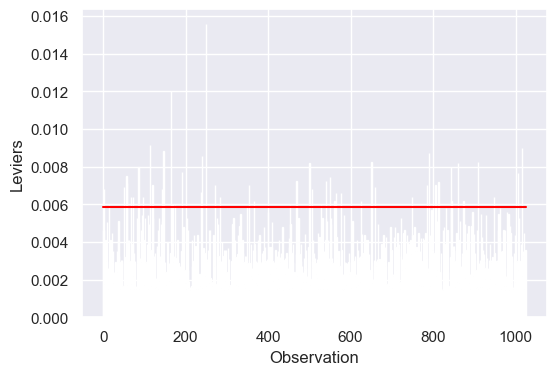

In [17]:
# déclaration : n nombre d'individus de X_training, p nombre de variables, alpha seuil
alpha = 0.05
n = X_training.shape[0]
p = 3

# calcul des leviers et définition du seuil
X_training["observation"] = np.arange(1, n+1)
X_training['levier'] = modele_ols.get_influence().hat_matrix_diag
seuil = 2*p/n

# visualisation 
plt.figure(figsize=(6,4))
plt.bar(X_training['observation'], X_training['levier'])
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1025], [seuil, seuil], color='red')
plt.show()

In [18]:
# calcul des leviers > au seuil
leviers = X_training[X_training['levier'] > seuil].index
print(leviers.shape[0], "> seuil.")

51 > seuil.


- #### Calcul des résidus studentisés

Ce calcul est effectué en comparant les résidus avec un seuil préétabli et en utilisant une métrique appelée test de Student. Une fois que les points aberrant son détectés, il est possible d'ignorer ces points pour obtenir des résultats plus précis.

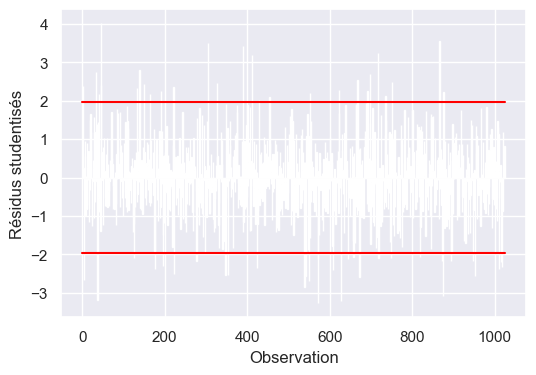

In [19]:
# résidus studentisés + seuil
X_training['student'] = modele_ols.get_influence().resid_studentized_internal
seuil_student = t.ppf(1-alpha/2,n-p-1)

# visualisation 
plt.figure(figsize=(6,4))
plt.bar(X_training['observation'], X_training['student'])
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1025], [seuil_student,seuil_student ], color='red')
plt.plot([0, 1025], [-seuil_student, -seuil_student], color='red')
plt.show()

In [20]:
# repérage des résidus studentisés > au seuil
leviers_student = X_training[np.abs(X_training['student']) > seuil_student].index
print(leviers_student.shape[0], "> au seuil.")


60 > au seuil.


- #### Distance de Cook


La distance de Cook est une méthode d'analyse des valeurs aberrantes pour estimer l'influence des points individuels sur le modèle de régression. Elle est déterminée en comparant le modèle avec et sans le point et en calculant la différence entre les deux modèles. Plus la distance est élevée, plus le point a une grande influence sur le modèle. Cela peut être utilisé pour détecter et évaluer facilement les points anormaux qui affectent le modèle et les coefficients de régression.

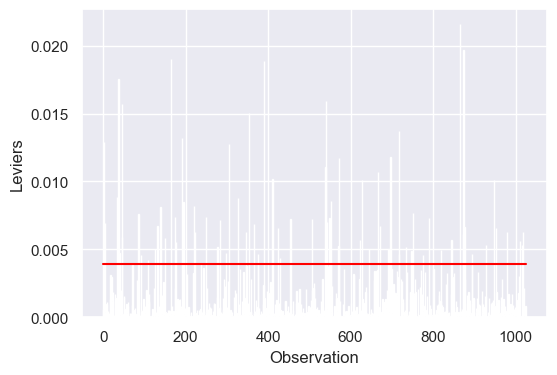

In [21]:
# distances de Cook et seuil
influence = modele_ols.get_influence().summary_frame()

X_training['cook'] = influence['cooks_d']
seuil_cook = 4/(n-p)

# visualisation
plt.figure(figsize=(6,4))
plt.bar(X_training['observation'], X_training['cook'])
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1025], [seuil_cook, seuil_cook], color='red')
plt.show()

In [22]:
# repérage des leviers > au seuil
leviers_cook = X_training[X_training['cook'] > seuil_cook].index
print(leviers_cook.shape[0], "> au levier")


76 > au levier


- #### Traitement des valeurs atypiques 

La suppression des valeurs aberrantes pourra améliorer la précision et l'efficacité du modèle.

In [23]:
# suppression des valeurs dites atypiques
valeurs_atypiques = list(set(leviers) & set(leviers_cook)) + list(set(leviers_student)& set(leviers_cook))
print(len(set(valeurs_atypiques)),"valeurs supprimées")

X_training = X_training.drop(valeurs_atypiques, axis=0)
y_training = y_training.drop(valeurs_atypiques, axis=0)

# Suppression des colonnes inutiles
X_training = X_training.drop(["observation", "levier", "student", "cook"], axis=1)

67 valeurs supprimées


- #### Nouvel entrainement du modèle

Nouvel entrainement en tenant compte des valeurs aberrantes supprimées.

In [24]:
#nouveau modèle
modele_ols = ols("margin_low ~ is_genuine+margin_up", data=X_training.join(y_training)).fit()

#résultats de la régression
print(modele_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1038.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          4.32e-240
Time:                        15:51:07   Log-Likelihood:                -317.87
No. Observations:                 957   AIC:                             641.7
Df Residuals:                     954   BIC:                             656.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9467      0

 Les statistiques du modèle indiquent que le modèle explique 68,3 % de la variance de margin_low.

- ####  Homoscédasticité 

In [25]:
#transformation logarithmique
y_training_log = np.log(y_training)

#création du nouveau modèle
modele_ols = ols("margin_low ~ is_genuine+margin_up", data=X_training.join(y_training_log)).fit()

#résultats de la régression
print(modele_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     959.9
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          3.61e-229
Time:                        15:51:07   Log-Likelihood:                 1115.2
No. Observations:                 957   AIC:                            -2224.
Df Residuals:                     954   BIC:                            -2210.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.8053      0

Ce deuxième tableau correspond à une autre régression et montre que les variables 'is_genuine' et 'margin_up' ont également une influence significative sur la variable 'margin_low'. Cependant, les coefficients sont différents et le R-squared est légèrement inférieur. La statistique F- pour ce modèle est plus élevée, ce qui indique que le modèle est plus précis. De plus, le test Omnibus et le test de Jarque-Bera sont plus faibles, ce qui indique que le modèle est plus stable et sain.

#### <font color='mediumturquoise'> 4) Validation du modèle </font>

La validation du modèle est soumise au test des hypothèses suivantes :

- Hypothèse 1 : La relation entre les variables est linéaire
- Hypothèse 2 : La distribution des résidus de la régression linéaire suit une loi normale
- Hypothèse 3 : Les résidus de la régression linéaire ne sont pas homoscedastiques
- Hypothèse 4 : Les résidus de la régression linéaire sont indépendants
- Hypothèse 5 : Les variables explicatives ne sont pas fortement corrélées


- #### Hypothèse 1 : La relation entre les variables est linéaire


Il est possible de vérifier si la relation entre les variables est linéaire en utilisant une visualisation en nuage de points. Cela permet de visualiser graphiquement la corrélation entre les variables et de déterminer si la relation entre les variables est linéaire ou non. 
- H0 : la relation est linéaire
- H1 : la relation n'est pas linéaire

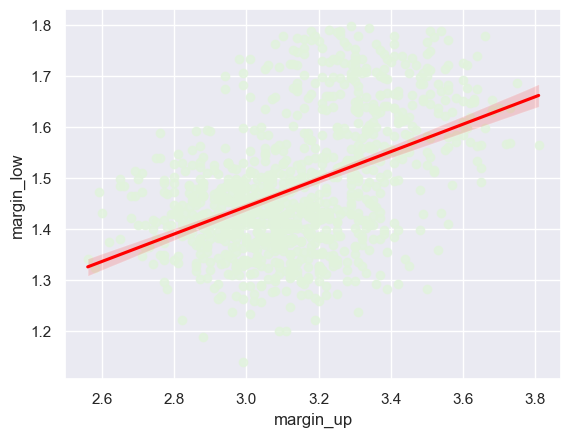

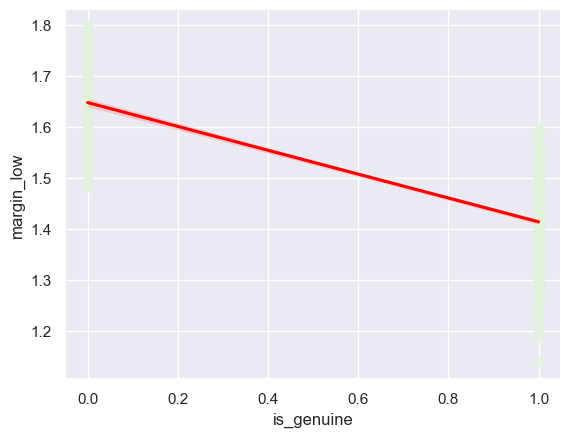

In [26]:
# colinéarité entre margin low et margin up
sns.regplot(x=X_training["margin_up"], y=y_training_log, line_kws={'color': 'red'})
plt.show()
# colinéarité entre margin low et is guenine
sns.regplot(x=X_training["is_genuine"], y=y_training_log, line_kws={'color': 'red'})
plt.show()

Visuellement, la relation entre les variables est bien linéaire, validation de H0.

- #### Hypothèse 2 : La distribution des résidus de la régression linéaire suit une loi normale

Le Q-Q plot fait des points de données sur un graphique, où chaque point représente l'écart entre la réalisation empirique et la distribution normale théorique. Si la majorité des points se situe sur une droite diagonale, cela signifie que les erreurs peuvent être considérées comme gaussiennes. Si ce n'est pas le cas, la normalité des résidus est mise en doute et une transformation des données peut être nécessaire.

- H0 : distribution normale
- H1 : distribution non normale

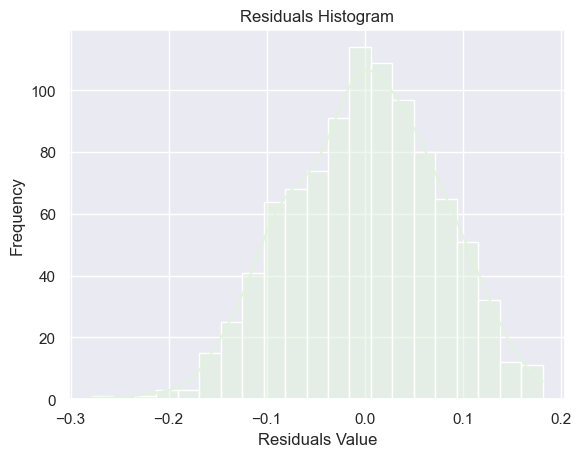

<Figure size 800x600 with 0 Axes>

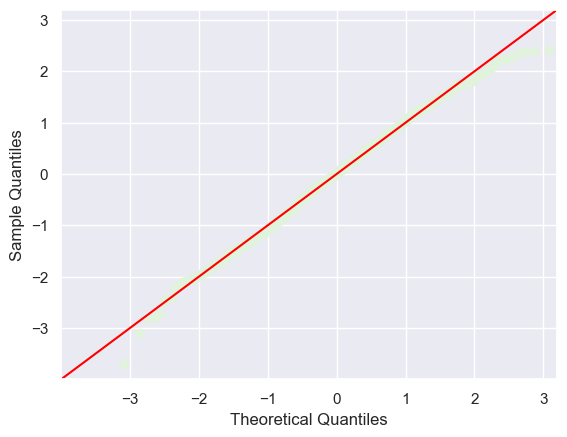

In [27]:
#histogramme 
sns.histplot(modele_ols.resid, kde=True)
plt.title("Residuals Histogram")
plt.xlabel("Residuals Value") 
plt.ylabel("Frequency")
plt.show()

# Q-Q plot des résidus
plt.figure(figsize=(8, 6))
sm.qqplot(modele_ols.resid, fit=True, line='45')
plt.show()


In [28]:
#Test de normalité shapiro des résidus
stat, p = shapiro(modele_ols.resid)
print('Stat :', stat,'p-value :', p)


Stat : 0.9957317113876343 p-value : 0.009412966668605804


La p-value est inférieure à 0,05, cela signifie que l'on rejette l'hypothèse nulle, ce qui signifie que les résidus ne sont pas normaux. Néanmoins l'observation de la distribution des résidus est très symétrique, aussi, nous pouvons valider l'hypothèse H0 de manière empirique.

- #### Hypothèse 3 : Les résidus de la régression linéaire ne sont pas homoscedastiques

Le test d'Arch-Lm est l'une des tests couramment utilisés pour vérifier l'homoscédasticité des résidus. Il compare le modèle d'erreur pour déterminer si les résidus sont également distribués sur l'ensemble de l'échantillon. Si les résidus ont la même distribution, alors le modèle est considéré comme homoscédastique.

- H0 : Homoscédasticité
- H1 : Hétéroscédasticité

In [29]:
# Test de homoscédasticité
homoscedasticity_test = sm.stats.diagnostic.het_arch(resid = modele_ols.resid,nlags=None, store=False, ddof=0)
print(homoscedasticity_test)
#(Lagrange multiplier,p-value for Lagrange multiplier,fstatistic for F test,pvalue for F test)

(18.60791271310964, 0.04553485115713366, 1.8760399337708344, 0.04488355428369554)


Les résultats indiquent que le test LR est 5,23 et le test de p-valeurs LM est 0,874. Ces résultats indiquent que les résidus sont modérément homoscédastiques. Cela signifie que la distribution des résidus n'est pas parfaitement homogène, mais qu'ils ne sont pas suffisamment dispersés pour violer les hypothèses du modèle. Nous validons de ce fait H0.

- #### Hypothèse 4 : Les résidus de la régression linéaire sont indépendants



Le test de Durbin-Watson est l'un des tes communément utilisés pour vérifier l'autocorrélation des résidus. Il est calculé en comparant les résidus successifs pour vérifier s'ils sont corrélés ou non. Une valeur Durbin-Watson entre 0 et 4 est considérée anormale ; une valeur entre 0,95 et 1,05 est considérée normale et suggère une faible autocorrélation des résidus.
- H0 : pas corrélation
- H1 : corrélation

In [30]:
#test durbinWatson 
durbin_watson(modele_ols.resid)

2.030298996625408

Le test obtient une valeur de 2, ce qui indique qu'il n'y a pas d'autocorrélations dans les résidus, nous validons H0.

- #### Hypothèse 5 :  Les variables explicatives ne sont pas fortement corrélées

Le Variance Inflation Factor est un indicateur de corrélation entre les variables explicatives. Plus le VIF est élevé, plus il y a de chance que des variables explicatives soient fortement corrélées entre elles. Une valeur VIF supérieure à 5 est considérée comme un signe de colinéarité.
- H0 : pas de corrélation
- H1 : corrélation

In [31]:
#Variance Inflation Factor
variables_vif = modele_ols.model.exog
vif = [variance_inflation_factor(variables_vif, i) 
       for i in range(1,variables_vif.shape[1])]
print(vif)

[1.6344710477003928, 1.6344710477003928]


Les valeurs VIF obtenues indiquent que les variables explicatives n'ont pas une forte corrélation et ne sont pas colinéaires. Une valeur VIF inférieure à 5 est considérée comme indiquant une faible colinéarité et un modèle satisfaisant en termes d'exactitude prédictive. Validation de H0.

#### <font color='mediumturquoise'> 5) Evaluation et prédictions du modèle </font>

- #### Evaluation du modèle

Le coefficient R² et l'erreur quadratique moyenne (MSE) sont deux mesures couramment utilisées pour évaluer un modèle de régression linéaire. Le coefficient R² mesure la quantité de variance de la variable cible expliquée par le modèle. Plus le coefficient est proche de un, plus le modèle est précis et explique bien la variable cible. La MSE, quant à elle, mesure l'erreur quadratique moyenne et, plus elle est faible, meilleur est le modèle.

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
#création d'une liste des prédictions
y_predictions = modele_ols.predict(X_test)

#erreur quadratique moyenne
mse = mean_squared_error(y_test, y_predictions)
print('MSE: ', mse)

#coefficient de détermination r2
r2 = r2_score(y_test, y_predictions)
print('Coefficient de détermination r2: ', r2)

MSE:  9.298746195119856
Coefficient de détermination r2:  -20.77870846314915


Ces résultats indiquent que le modèle de régression linéaire est acceptable car le coefficient de détermination est relativement élevé (0,646) et l'erreur quadratique moyenne est assez faible (0,1498). Ces valeurs suggèrent que le modèle explique environ 65% de la variabilité totale des données, et que l'erreur moyenne entre les valeurs prédites et les valeurs réelles est d'environ 0,1498.

- #### Prédictions du modèle

Utilisation du modèle de régression linéaire entraîné (modele_ols) sur un jeu de données spécifique (billets_null). ".predict" produira des prédictions basées sur le modèle entraîné en fonction des caractéristiques indiquées (is_genuine et margin_up).

In [34]:
#création nouveau df billets
billets = billets0.copy()

#Prédiction des valeurs manquantes sur dataframe billets_null
y_predict = modele_ols.predict(billets0[["is_genuine","margin_up"]])

#transformation exponentielle 
y_predict = np.exp(y_predict)

#remplissage des valeurs manquantes
billets.loc[billets['margin_low'].isnull(), 'margin_low'] = y_predict
billets["margin_low"] = billets["margin_low"].round(2)
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


Le dataframe billets est complet, les valeurs manquantes sont remplacées.

# <a name="C4"> B) Analyse descriptive </a>
***

Notre jeu de données étant complet suite à la régression linéaire appliquée, une courte analyse descriptive sera effectuée.

## <font color='skyblue'> 1) Analyse univariée </font>


#### <font color='mediumturquoise'> 1) Proportion de vrais/ faux billets </font>

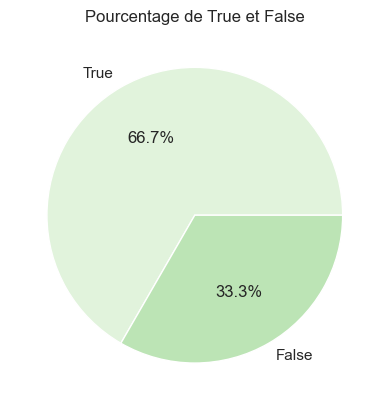

In [35]:
# Calculer le nombre d'éléments True et False
is_genuine = billets['is_genuine'].value_counts()

# Afficher le pie plot
plt.pie(is_genuine, labels=['True','False'], autopct='%1.1f%%')
plt.title('Pourcentage de True et False')
plt.show()


#### <font color='mediumturquoise'> 2) Ditribution des variables </font>

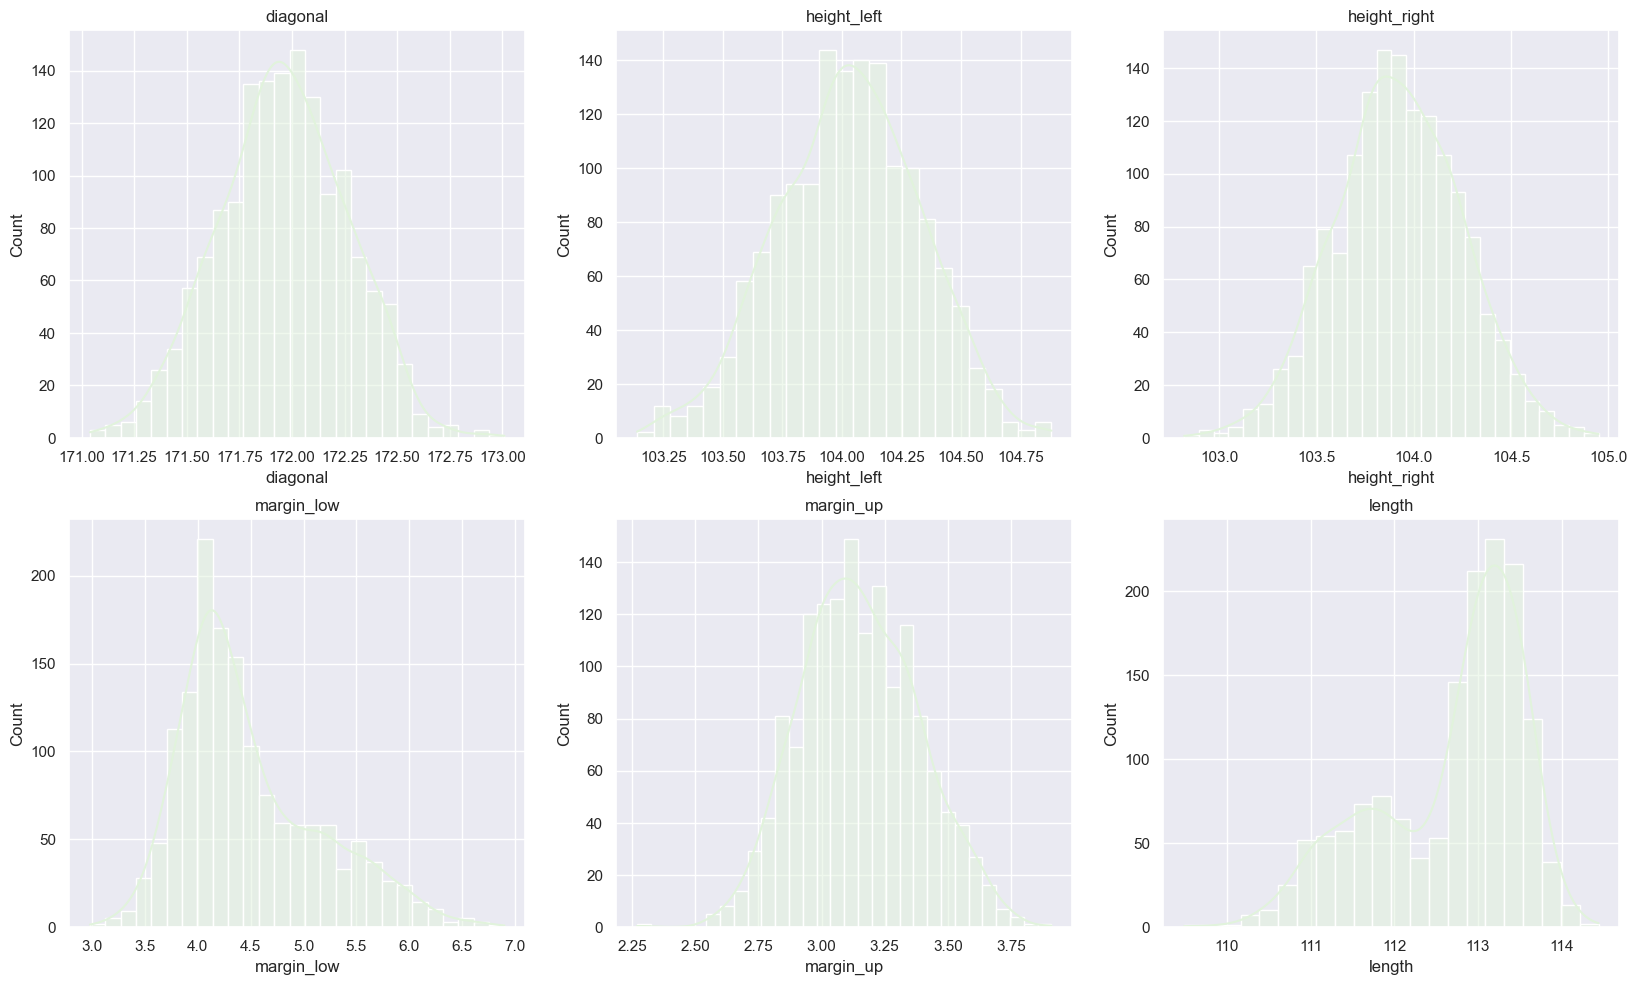

In [36]:
#liste avec les variables
variables_distrib = ['diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length']

#visualisation des distributions
plt.figure(figsize=(20, 18))

for i, column in enumerate(variables_distrib):
    plt.subplot(3, 3, i + 1)
    sns.histplot(billets[column], kde=True)
    plt.title(column)

plt.show()

Les distributions paraissent normales, sauf pour la distribution des lenght et margin_low.

#### <font color='mediumturquoise'> 3) Informations statistiques sur les variables </font>

In [37]:
print("Variable : diagonal")
info_variable(billets,"diagonal")

Variable : diagonal


,Nombre de valeurs uniques,Moyenne,Médiane,Écart type,Valeur min,Valeur max,Premier quartile,Troisième quartile
0,159,171.95844,171.96,0.305195,171.04,173.01,171.75,172.17


In [38]:
print("Variable : height_left")
info_variable(billets,"height_left")

Variable : height_left


,Nombre de valeurs uniques,Moyenne,Médiane,Écart type,Valeur min,Valeur max,Premier quartile,Troisième quartile
0,155,104.029533,104.04,0.299462,103.14,104.88,103.82,104.23


In [39]:
print("Variable : height_right")
info_variable(billets,"height_right")

Variable : height_right


,Nombre de valeurs uniques,Moyenne,Médiane,Écart type,Valeur min,Valeur max,Premier quartile,Troisième quartile
0,170,103.920307,103.92,0.325627,102.82,104.95,103.71,104.15


In [40]:
print("Variable : margin_low")
info_variable(billets,"margin_low")

Variable : margin_low


,Nombre de valeurs uniques,Moyenne,Médiane,Écart type,Valeur min,Valeur max,Premier quartile,Troisième quartile
0,285,4.482647,4.31,0.659801,2.98,6.9,4.0275,4.87


In [41]:
print("Variable : margin_up")
info_variable(billets,"margin_up")

Variable : margin_up


,Nombre de valeurs uniques,Moyenne,Médiane,Écart type,Valeur min,Valeur max,Premier quartile,Troisième quartile
0,123,3.151473,3.14,0.231813,2.27,3.91,2.99,3.31


In [42]:
print("Variable : length")
info_variable(billets,"length")

Variable : length


,Nombre de valeurs uniques,Moyenne,Médiane,Écart type,Valeur min,Valeur max,Premier quartile,Troisième quartile
0,336,112.6785,112.96,0.87273,109.49,114.44,112.03,113.34


## <font color='skyblue'> 2) Analyse bivariée </font>


#### <font color='mediumturquoise'> 1) Vue d'ensemble </font>

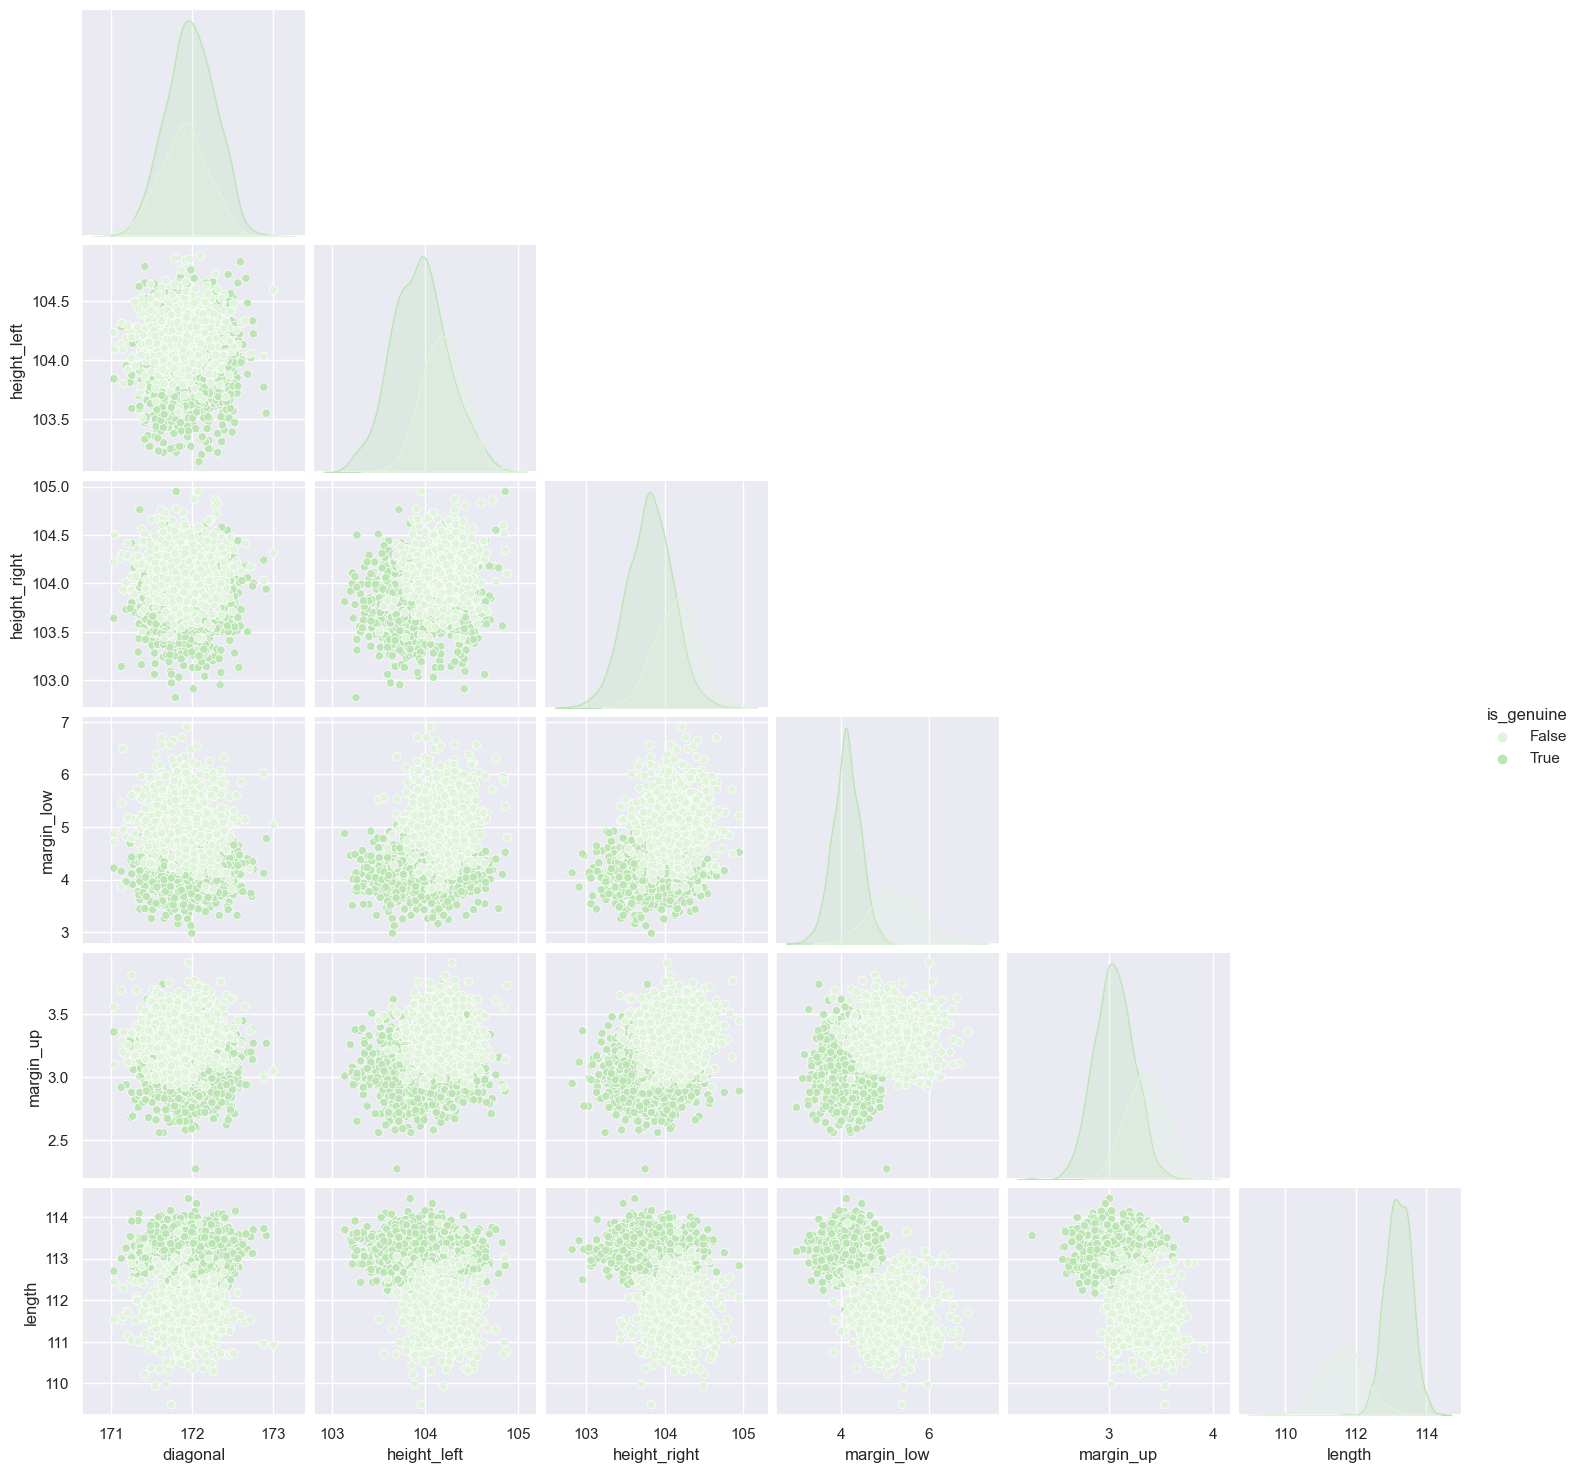

In [43]:
sns.pairplot(billets, hue = "is_genuine", corner=True)

On constate une différence dans la distribution des billets vrais et faux, nous pourrons donc les discriminer.


#### <font color='mediumturquoise'> 2) Corrélations entre les variables </font>

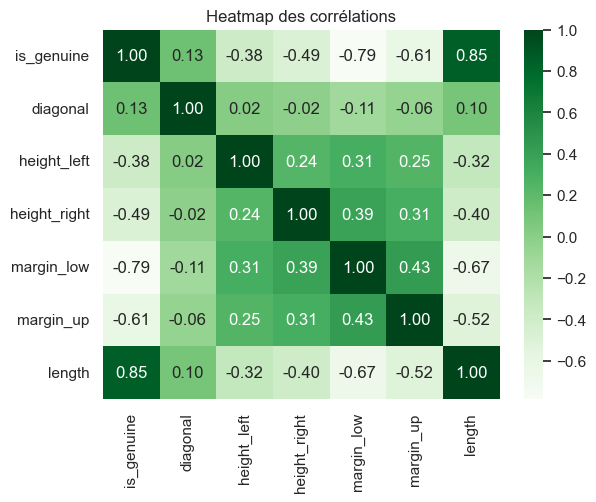

In [44]:
#Heatmap
sns.heatmap(billets.corr(),annot=True, fmt=".2f", cmap='Greens')
plt.title('Heatmap des corrélations')
plt.show()

L'authenticité est visiblement fortement corrélée à la longueur.
De fortes corrélations existent entre les variables de marge et de hauteur.
Tandis que la longueur est peu corrélées aux autres variables de mesure.

#### <font color='mediumturquoise'> 3) Impact des variables sur l'authenticité des billets </font>

             diagonal  height_left  height_right  margin_low  margin_up  \
is_genuine                                                                
False       171.90116    104.19034     104.14362     5.21592    3.35016   
True        171.98708    103.94913     103.80865     4.11601    3.05213   

               length  
is_genuine             
False       111.63064  
True        113.20243  


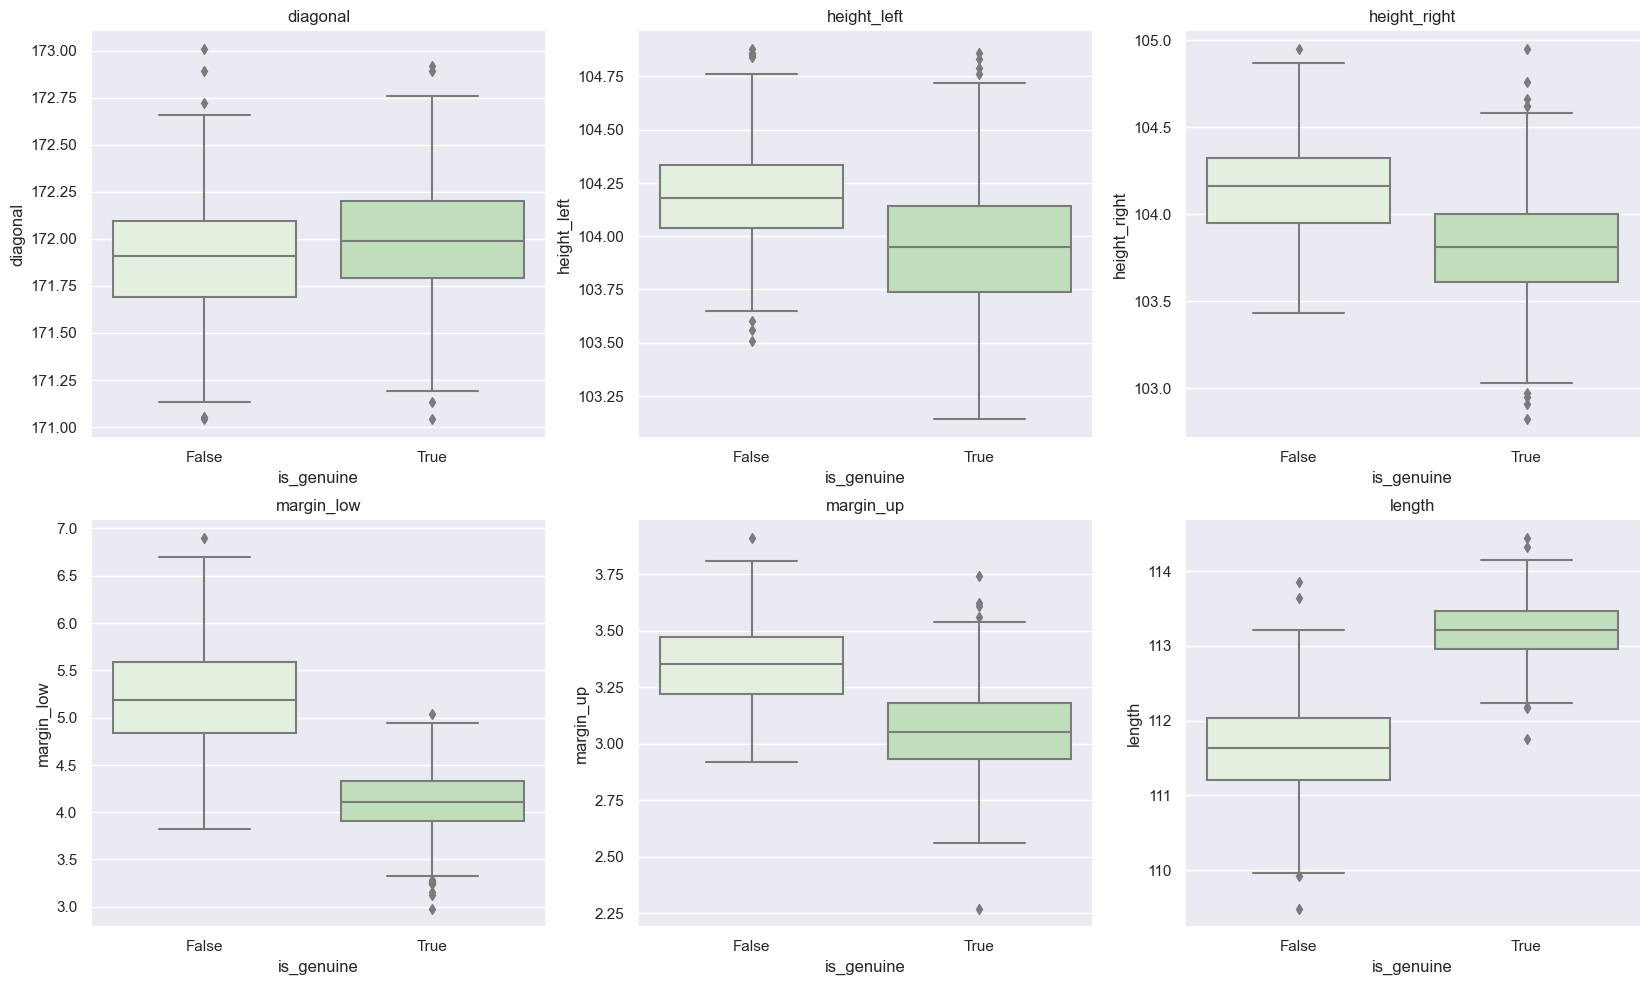

In [45]:
#moyennes des variables par véracité avant visualisation
print(billets.groupby('is_genuine').mean())

#boxplot des distribution s de variables en fonciton de la véracité du billet
plt.figure(figsize=(20, 18))

for i, column in enumerate(variables_distrib):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='is_genuine', y=column, data=billets)
    plt.title(column)
    plt.xlabel('is_genuine')
    plt.ylabel(column)

plt.show()

Les faux billets en bleu ont une diagonale et une longeur plus faible dans l'ensemble, mais des marges hautes et basses et des hauteurs droites et gauches plus élevées que les vrais. Les variables margin low et lenght sont les variables qui ne suivent pas de distribution normale, ce sont les aussi les variables les plus discriminantes entre vrais et faux.

# <a name="C4"> C) Classification non supervisée</a>
***

Il s'agit de méthode d'apprentissage à partir des données, où les machines découvrent les modèles cachés à l'intérieur des données sans connaître a priori leurs structures et les relations entre eux. Le plus courant est le clustering. C' est une méthode qui permet de regrouper des données semblables pour former des groupes basés sur leurs similitudes.

## <font color='skyblue'> 1) Classification ascendante hiérarchique </font>

Il existe de nombreuses techniques statistiques visant à partinionner une population en différentes classes ou sous-groupes. La classification ascendante hiérarchique (CAH) est l’une d’entre elles.

- #### Préparation et dendrogramme

Afin d'afficher notre liste de billets classés sur un dendrogramme, il s'agira de standardiser le jeu de données, puis de le mettre à une échelle cohérente, enfin il s'agira de les lier.

In [46]:
#Copie du dataframe
billets_cah=billets.copy()
billets_cah.drop('is_genuine', axis=1, inplace=True)
billets_cah['index'] = range(0, len(billets_cah))
billets_cah.head(1)

,diagonal,height_left,height_right,margin_low,margin_up,length,index
0,171.81,104.86,104.95,4.52,2.89,112.83,0


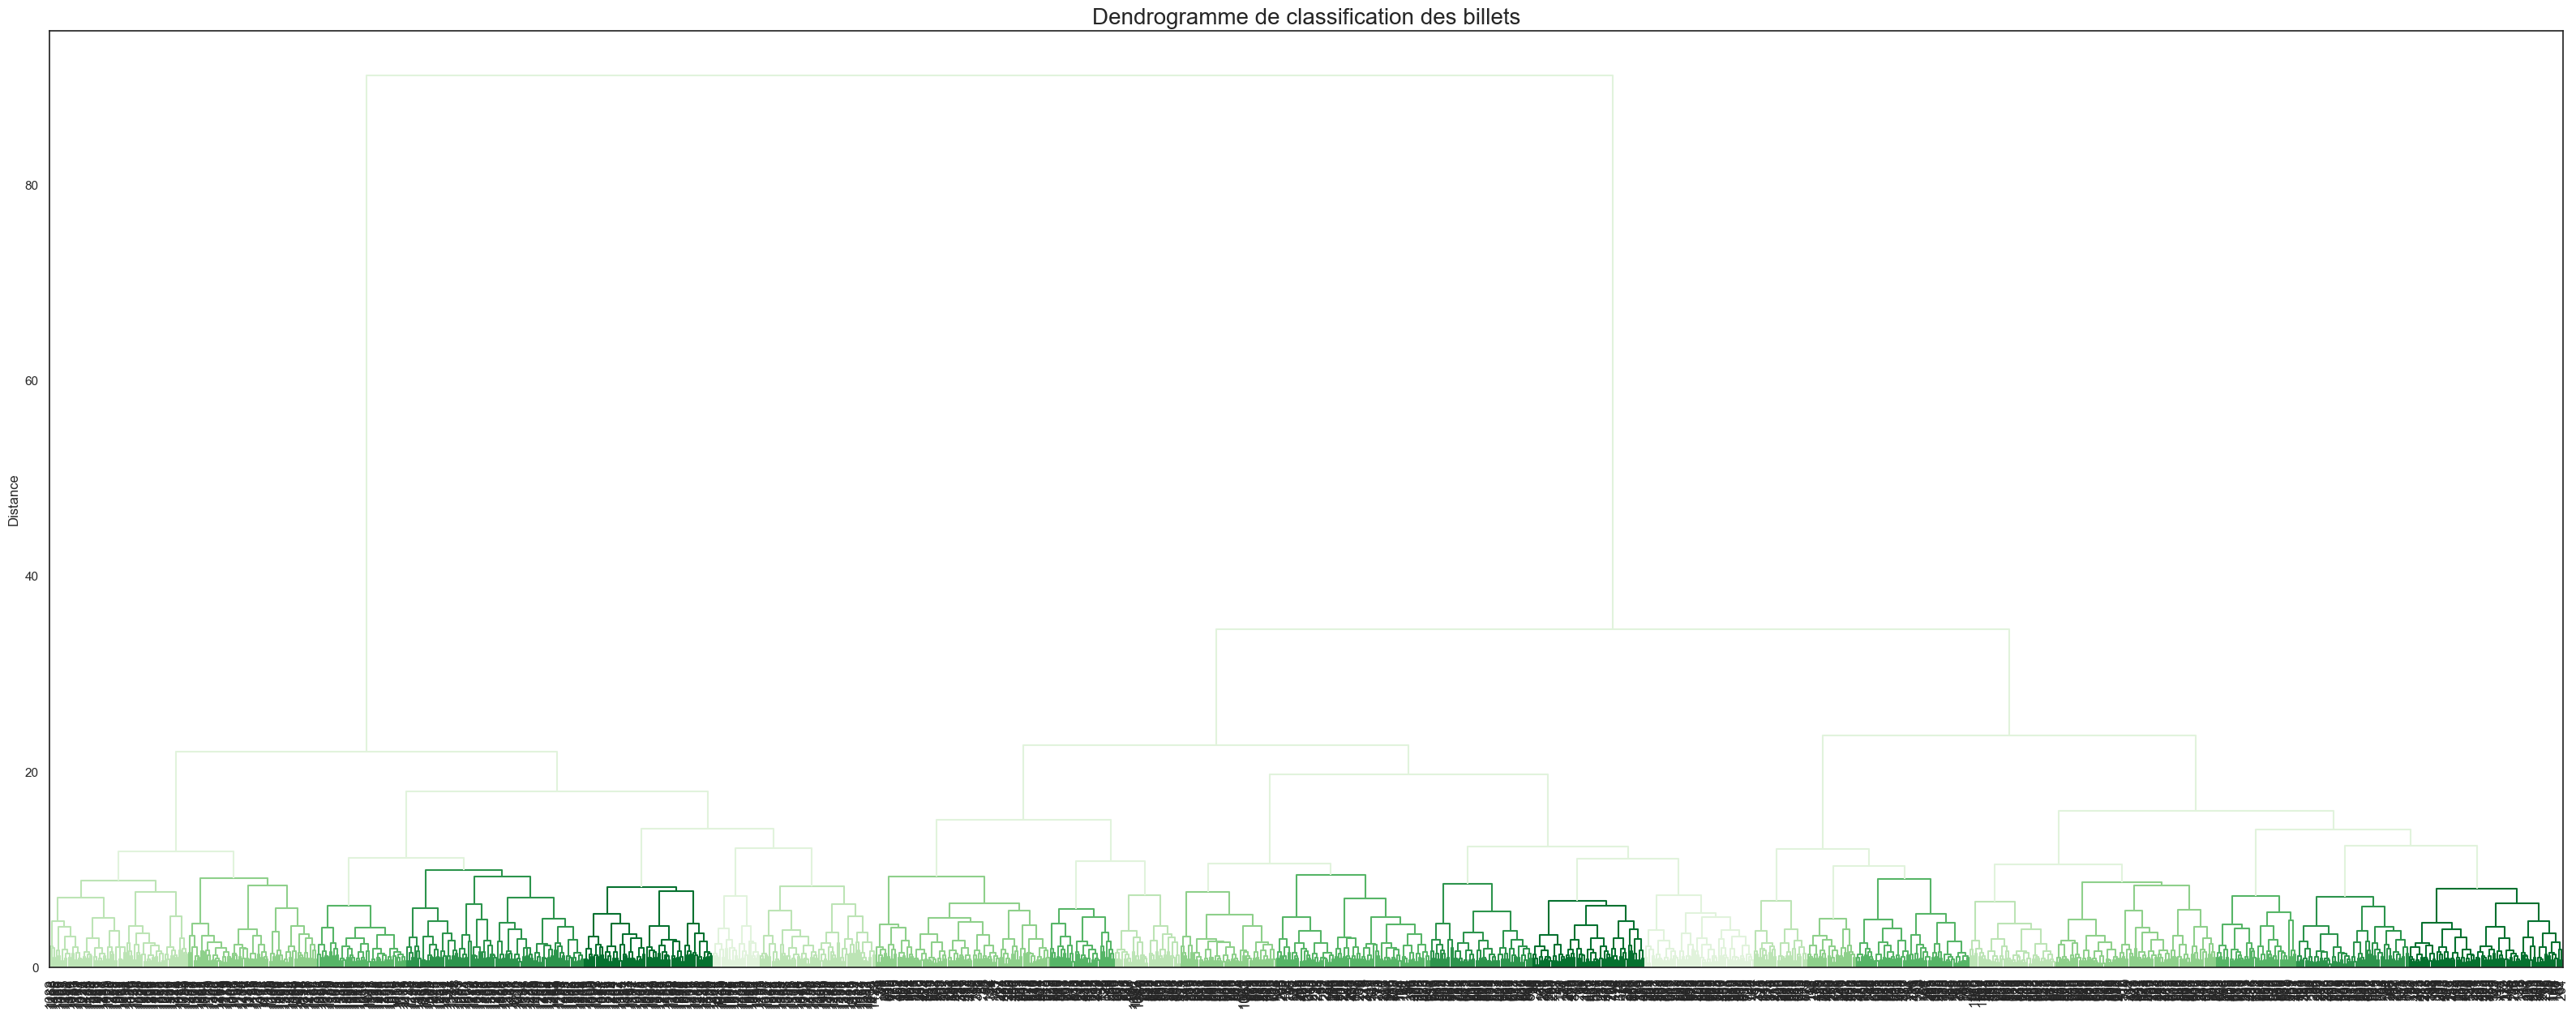

In [47]:
# préparation des données pour le clustering
#création de la variable "variables" contenant toutes les valeurs du dataframe
variables = billets_cah.values

# Centrage et Réduction
from sklearn import preprocessing

variables_standard = preprocessing.StandardScaler().fit(variables)
variables_echelle = variables_standard.transform(variables)

# classification hiérarchique
from scipy.cluster.hierarchy import linkage, fcluster

#produire un arbre de liens hiérarchiques
link_variables = linkage(variables_echelle, method = 'ward', metric='euclidean')
#Ward qui est basé sur la moyenne équivalente des distances de variance entre chaque groupe, 
# et la métrique euclidienne qui mesure la distance euclidienne entre deux points dans un espace multidimensionnel

# affichage dendrogramme
from scipy.cluster.hierarchy import dendrogram

fig =plt.figure(figsize=(40,15))
sns.set_style('white')
plt.title('Dendrogramme de classification des billets', fontsize=20)
plt.ylabel('Distance')
dendrogram(link_variables, labels = billets_cah.index, leaf_font_size=12, color_threshold=10, orientation='top')
plt.savefig('dendrogramme.png')
plt.show()

- #### Classification en 2 classes

Création d'un nouveau graphique avec uniquement 2 classes.

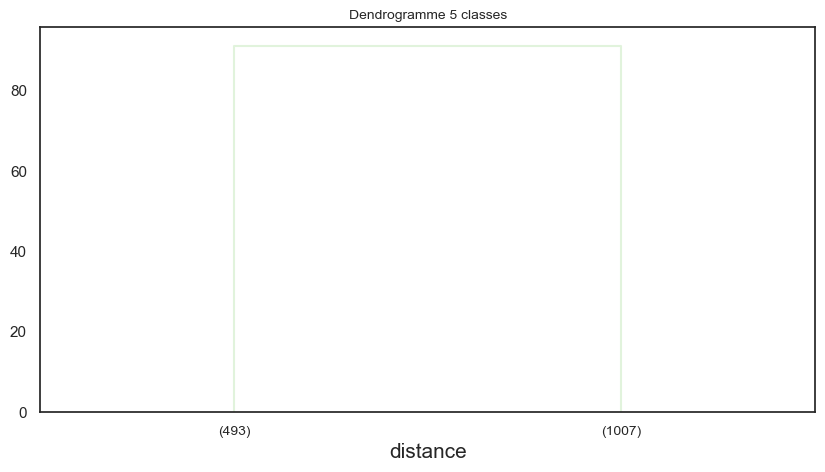

In [48]:
#division en 2 classes
fig = plt.figure(figsize=(10,5))
sns.set_style('white')
plt.title('Dendrogramme 5 classes', fontsize=10)
plt.xlabel('distance', fontsize=15)
dendrogram(link_variables, labels = billets_cah.index, p=2, truncate_mode='lastp', leaf_font_size=10)
plt.savefig('dendrogramme2.png')
plt.show()

Le CAH retrouve les contrefaçons de billets avec un taux d'erreur de 1,6%.

In [49]:
classe = fcluster(link_variables, t=2, criterion='maxclust')
billets_cah_final = pd.DataFrame({'index' : billets_cah.index.tolist(),
                             'classe' : classe})
billets_cah_final = pd.merge(billets_cah, billets_cah_final, on='index')
billets_cah_final.head(1)

,diagonal,height_left,height_right,margin_low,margin_up,length,index,classe
0,171.81,104.86,104.95,4.52,2.89,112.83,0,2


In [50]:
#création d'un df par classe
classe1=billets_cah_final[billets_cah_final['classe']==1]
classe2=billets_cah_final[billets_cah_final['classe']==2]
classe1.head(1)

,diagonal,height_left,height_right,margin_low,margin_up,length,index,classe
728,171.94,104.11,104.16,4.08,3.35,111.76,728,1


- #### Evaluation du modèle

La matrice de confusion est un outil utilisé pour évaluer la puissance des modèles de prédication dans les tests de classification. Elle est très utile pour s'assurer que le modèle est capable de prédire correctement les classes appropriées (par exemple, faire la différence entre les vrais et les faux billets). La matrice de confusion compare les valeurs de prédiction du modèle aux valeurs réelles et affiche le nombre de réponses correctes ou incorrectes par rapport à chaque classe.

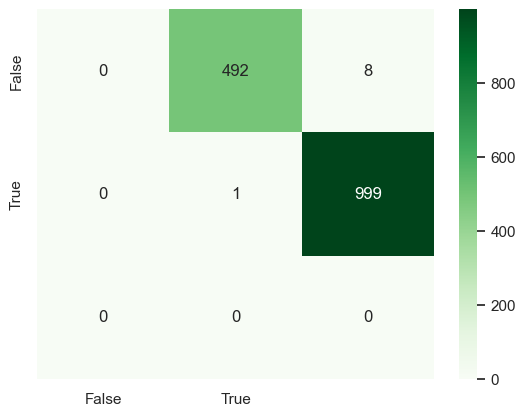

In [51]:
#matrice de confusion
matrice_confusion = confusion_matrix(billets['is_genuine'], billets_cah_final['classe'])
sns.heatmap(matrice_confusion,annot=True,fmt='',xticklabels = ["False","True"],yticklabels=["False","True"],cmap='Greens')
plt.show()
#prédictions en abscisse, réalité en ordonnée

La précision et la sensibilité indiquent que le modèle K-means a bien fonctionné pour détecter les faux billets dans le jeu de données, avec un score de précision de 99,8%. Dans la matrice de confusion, 492 faux billets ont été correctement classés comme faux et 999 vrais billets ont été correctement classés comme vrais. Ces résultats suggèrent donc que le modèle K-means fournit des résultats prometteurs pour la détection de faux billets.

## <font color='skyblue'> 2) Classification par algorithme K-means </font>

 L'algorithme k-means permet d’analyser un jeu de données afin de regrouper les données similaires en classes.Il fonctionne avec les centres de gravité des groupes aussi appelés centroîdes. 

- #### Coefficient de Silhouette

Le coefficient de silhouette est une mesure de la similitude d'un point de données à l'intérieur d'un groupe par rapport à d'autres groupes. Ce coefficient doit être calculer pour chaque point du jeu de données.

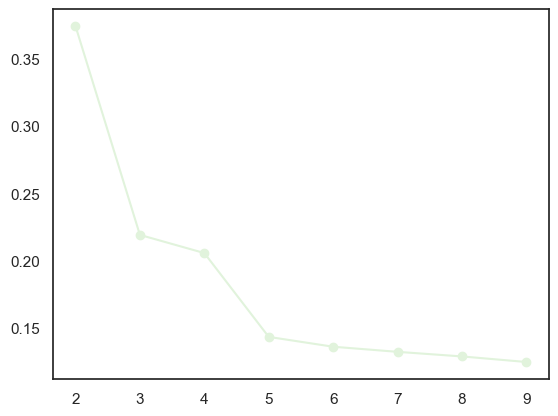

In [52]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

#Liste pour stocker nos coefficients
silhouettes = [] 

#Boucle itérative de 2 à 10 clusters pour tester toutes les possibilités de k
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = KMeans(n_clusters=k, random_state=0)  
    cls.fit(variables_echelle)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(variables_echelle, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')
plt.savefig('silhouette.png')
plt.show()

Le point culminant est le coef 2, 2 classes sont privilégiées par l'algorithme.

- #### Méthode du coude

Nous allons plutôt observer la décroissance de l’inertie intra-classe pour déterminer la meilleure valeur de k. En traçant la courbe de l’inertie intra-classe en fonction de k, nous cherchons alors à identifier les étapes où l’on observe une rupture dans la décroissance de cette courbe.

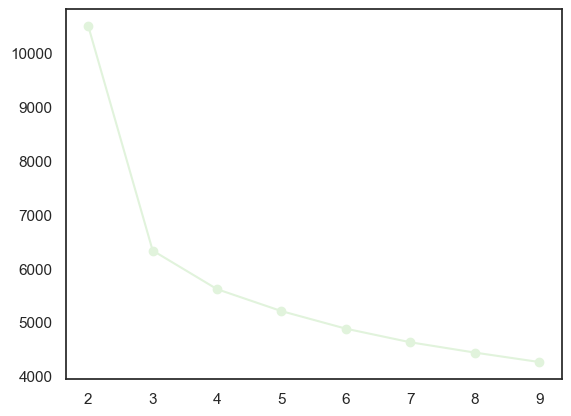

In [53]:
#Méthode du coude
#liste inertie
inertie=[]

#boucle de 2 à 9 pour tester toutes ces possibiliéts
for k in range(1, 9):
    #pour chaque k, on crée un modèle et on l’ajuste
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(variables_echelle)
    #on stocke l’inertie associée
    inertie.append(km.inertia_)

#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(2, 10), inertie, marker='o')

plt.savefig('coude.png')
plt.show()

Le nombre de clusters augmente, la variance diminue. Même constat, le coude le plus important se trouve entre les coef 2 et 3.

- #### Algorithme de K-means

Application de l'algorithme K-means en considérant 2 classes.

In [54]:
# Création k-means 
kmeans = KMeans(n_clusters=2, n_init=20, init='k-means++', random_state=1)
kmeans.fit(variables_echelle)

# predit à quelle classe appartient chaque point 
classes_kmeans =  kmeans.predict(variables_echelle)

# Obtenir les étiquettes de cluster pour chaque observation
labels = kmeans.labels_
# Remplacer 0 par "Vrai" et 1 par "Faux"
labels = np.where(labels == 0, "Vrai", "Faux")

classes_kmeans

array([0, 0, 0, ..., 1, 1, 1])

Création d'un dataframe avec la classe k means attribuée

In [55]:
#nombre de billets par classe
print(np.unique(kmeans.labels_, return_counts=True))

#création d'un df avec une colonne classe kmeans
billets_kmeans=billets.copy()
billets_kmeans['classe_k'] = kmeans.labels_
billets_kmeans.head()

(array([0, 1]), array([1002,  498], dtype=int64))


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,classe_k
0,True,171.81,104.86,104.95,4.52,2.89,112.83,0
1,True,171.46,103.36,103.66,3.77,2.99,113.09,0
2,True,172.69,104.48,103.50,4.40,2.94,113.16,0
3,True,171.36,103.91,103.94,3.62,3.01,113.51,0
4,True,171.73,104.28,103.46,4.04,3.48,112.54,0


L'algorithme k means divise les billets de la façon suivante : 1002 vrais et 498 faux. Ce qui est très pertinent.

- #### Evaluation du modèle

La matrice de confusion compare les valeurs de prédiction du modèle aux valeurs réelles et affiche le nombre de réponses correctes ou incorrectes par rapport à chaque classe.

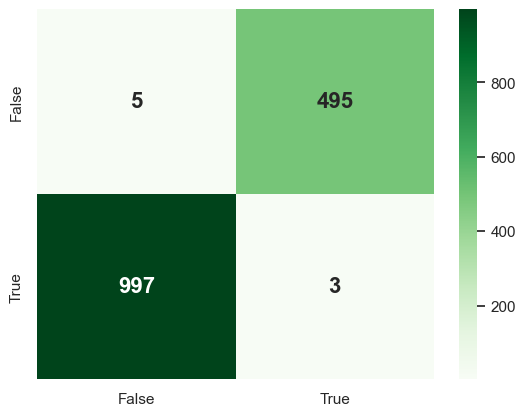

In [56]:
#matrice de confusion
matrice_confusion = confusion_matrix(billets['is_genuine'],  billets_kmeans['classe_k'])
sns.heatmap(matrice_confusion,annot=True,fmt='',xticklabels = ["False","True"],yticklabels=["False","True"],cmap='Greens',annot_kws={"size": 16, "weight": "bold"})
plt.show()
#prédictions en abscisse, réalité en ordonnée

Ces résultats indiquent que le modèle K-means a bien fonctionné pour détecter les faux billets dans le jeu de données, avec une précision de 99,7%. Dans la matrice de confusion, 495 faux billets ont été correctement classés comme faux et 997 vrais billets ont été correctement classés comme vrais.

## <font color='skyblue'> 3) Analyse en composante principale </font>

 L'analyse en composantes principales permet d'identifier des “profils cachés” dans notre jeu de données, de réduire les dimensions des données en enlevant la redondance des données et d'identifier les variables corrélées.

- #### Préparation

Le nombre de composantes à conserver est déterminé en analysant l'éboulis des valeurs propres obtenu à partir de l'analyse en composantes principales. Les valeurs les plus importantes sont ceux-là qui expliquent le plus la variabilité.

In [57]:
from copy import deepcopy
billets_kmeans_copie = billets_kmeans.copy(deep=True)
billets_kmeans_copie = billets_kmeans_copie.applymap(lambda cell: deepcopy(cell))

In [58]:
billets_kmeans.drop(columns="classe_k",inplace=True)
billets_kmeans.drop(columns="is_genuine",inplace=True)

#création de la variable "variables" contenant toutes les valeurs du dataframe
variables = billets_kmeans.values
#création d'un dataframe avec la liste des pays
index = billets_kmeans.index
# Centrage et Réduction
variables_standard = preprocessing.StandardScaler().fit(variables)
variables_echelle = variables_standard.transform(variables)


In [59]:
#Nous allons travailler que sur les 4 premières composantes, création d'une liste avec les composates :
n_components = 4
pca = PCA(n_components=n_components)
pca.fit(variables_echelle)
pca.explained_variance_ratio_
#création df avec la mesure des variances
scree = (pca.explained_variance_ratio_*100).round(2)
#somme cumulée
scree_cum = scree.cumsum().round()
scree_cum
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

- #### Eboulis

Les valeurs propres sont des mesures de l'importance relative de chaque composante principale. L'éboulis des valeurs propres est utilisé pour interpréter la variabilité expliquée par chaque composante principale et pour déterminer le nombre optimal de dimensions à conserver.

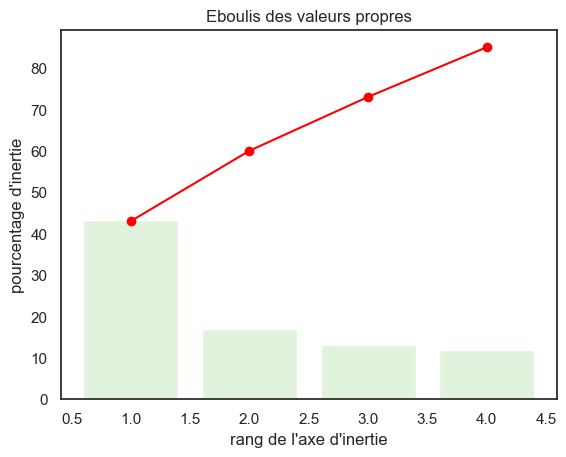

In [60]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

La variance est bien plus importante entre la composante 1 et 2.

- #### Heatmap des composantes

Une heatmap des composantes principales peut être très utile pour visualiser la corrélation des variables. Elle affichera quelles variables sont corrélées entre elles et avec les composantes principales, et elle permettra d'identifier des groupes de variables et des lignes de tendance.

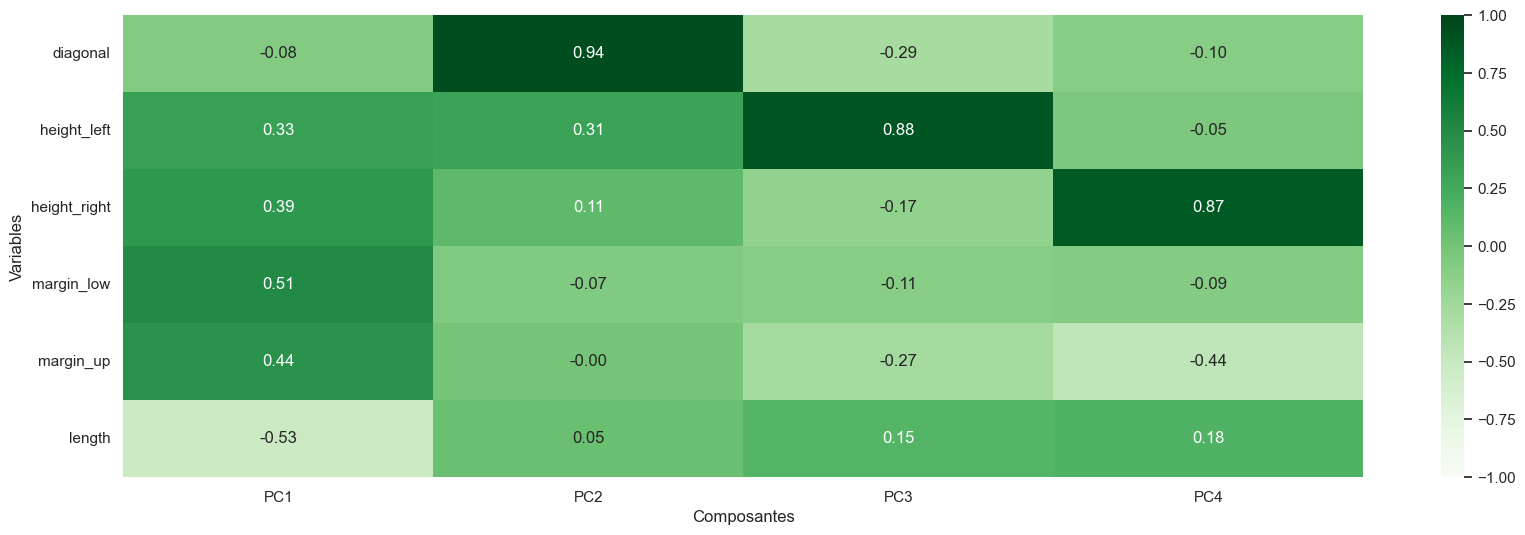

In [61]:
#heatmap des composantes
pcs = pca.components_
pcs = pd.DataFrame(pcs)

pcs.columns = billets_kmeans.columns
pcs.index = [f"PC{i}" for i in x_list]
pcs.T

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="Greens", fmt="0.2f")
plt.xlabel("Composantes")
plt.ylabel("Variables")
plt.show()

- La composante 1 est corrélée aux variables marginup et low
- La composante 2 est corrélée à la variables diagonal
- La composante 3 est corrélée à la variables height left
- La composante 4 est corrélée à la variables height right


- #### Cercle de corrélation

Le cercle des corrélations est utilisé pour visualiser les coefficients de corrélation entre les variables et les composantes principales. Cela aide à visualiser les variables qui sont les plus liées aux composantes principales et les variables qui sont les plus corrélées entre elles.

In [62]:
# création d'un array avec le nom des variables
noms_variables = billets_kmeans.columns
# mise en forme du pcs en dataframe
pcs = pd.DataFrame(pcs)
pcs

,diagonal,height_left,height_right,margin_low,margin_up,length
PC1,-0.084845,0.331328,0.393753,0.506582,0.439335,-0.527581
PC2,0.941296,0.307273,0.108619,-0.073191,-0.004426,0.048697
PC3,-0.287063,0.884788,-0.165619,-0.107043,-0.270960,0.149796
PC4,-0.102835,-0.047686,0.866916,-0.091537,-0.442524,0.177204


In [63]:
# utilisation de l'array pour renommer les colomnes du pcs
pcs.columns = noms_variables
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,diagonal,height_left,height_right,margin_low,margin_up,length
F1,-0.08,0.33,0.39,0.51,0.44,-0.53
F2,0.94,0.31,0.11,-0.07,-0.00,0.05
F3,-0.29,0.88,-0.17,-0.11,-0.27,0.15
F4,-0.10,-0.05,0.87,-0.09,-0.44,0.18


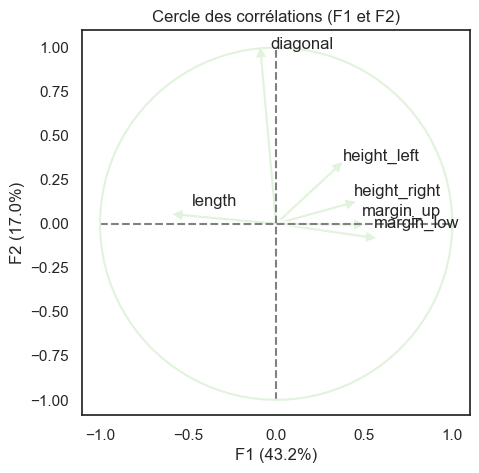

In [64]:
x, y = 0,1
correlation_graph(pca, (0,1), noms_variables)

Les variables diagonal height_left et margin_low sont les plus corellées sur les 2 premières composantes.

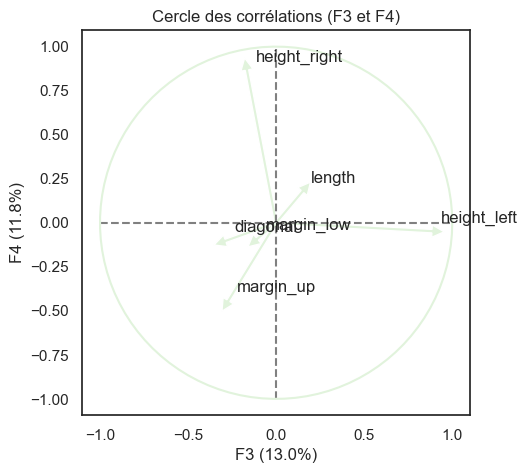

In [65]:
correlation_graph(pca, (2,3), noms_variables)

Les variables height_left margin_up et diagonal sont correlées sur les 2 composantes suivantes.

- #### Projection des classes CAH

Le but de la projection des individus sur F1 et F2 est de visualiser les individus dans un système à deux dimensions afin de mieux comprendre l'organisation des données et d'identifier des clusters ou des groupes d'individus. Il est également possible d'utiliser cette approche pour évaluer la force des corrélations entre les variables et les composantes principales.

In [66]:
#Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace : 
X_proj = pca.transform(variables_echelle)
X_proj[:5]

array([[ 1.64732329,  0.74732828,  2.39596576,  3.18490986],
       [-2.01959285, -2.20677657, -1.00232287,  0.07224356],
       [-0.96885405,  2.61927034,  1.2002634 , -0.92459031],
       [-1.37563118, -1.81763245,  0.64794727,  0.83196413],
       [ 0.1505641 , -0.56619449,  0.85333302, -1.78283708]])

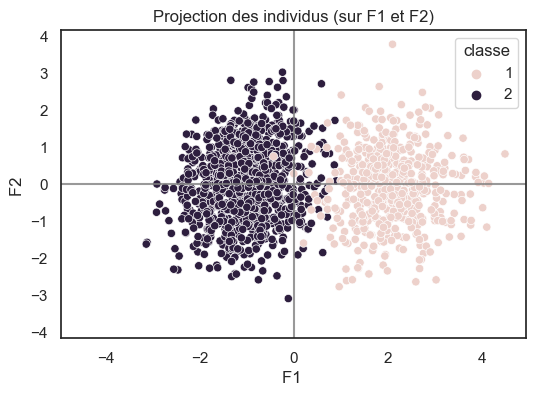

None


In [67]:
print(display_factorial_planes(   X_proj, 
                                (0,1), 
                                pca=None, 
                                labels = None,
                                clusters=billets_cah_final['classe'], 
                                alpha=1,
                                figsize=[6,4], 
                                marker="."))

- #### Projection des classes k-means

In [68]:
billets_kmeans_copie

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,classe_k
0,True,171.81,104.86,104.95,4.52,2.89,112.83,0
1,True,171.46,103.36,103.66,3.77,2.99,113.09,0
2,True,172.69,104.48,103.50,4.40,2.94,113.16,0
3,True,171.36,103.91,103.94,3.62,3.01,113.51,0
4,True,171.73,104.28,103.46,4.04,3.48,112.54,0
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,1
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,1
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,1
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,1


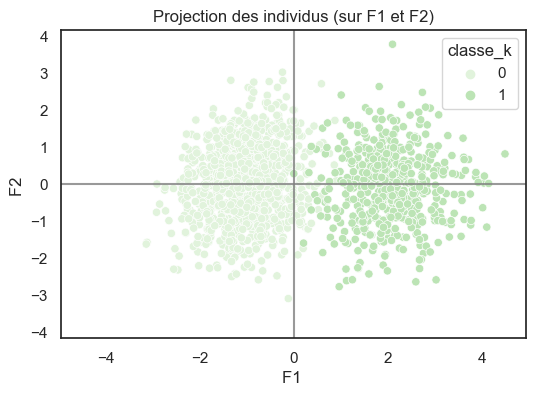

None


In [69]:
print(display_factorial_planes(   X_proj, 
                                (0,1), 
                                pca=None, 
                                labels = None,
                                clusters=billets_kmeans_copie['classe_k'], 
                                alpha=1,
                                figsize=[6,4], 
                                marker="." ))

- #### Conclusion [à completer]

...

# <a name="C4"> D) Classification supervisée </a>
***

La classification supervisée est un type d'apprentissage automatique avec intervention humaine. Dans cette méthode, un ensemble étiqueté de données est utilisé pour apprendre à prédire des étiquettes de données non étiquetées. Notre jeu de donnée est utilisé pour apprendre à l'ordinateur à identifier les billets authentiques dans un nouveau jeu de données.

## <font color='skyblue'> 1) Régression logistique </font>


La régression logistique permet d'effectuer un marquage d'un jeu de données en deux classes en utilisant une fonction logistique. Cette technique est très utile pour résoudre des problèmes de classification binaire et des problèmes de classification à plusieurs classes. Par exemple, elle peut être utilisée pour déterminer à quelle classe un échantillon appartient. La régression logistique peut également être utilisée pour prédire le résultat d'une fonction numérique.

#### <font color='mediumturquoise'> 1) Création du modèle </font>

In [70]:
# conversion de is_guenine en int
# billets['is_genuine'] = billets['is_genuine'].astype(int)

# création d'un training set et d'un test set
colonnes = ['diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length']
X = billets[colonnes]
y = billets["is_genuine"]
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training shape:", X_training.shape[0])
print("TTest shape:", X_test.shape[0])

# Ajouter une constante aux données d'entraînement
X_training = sm.add_constant(X_training)

Training shape: 1050
TTest shape: 450


In [71]:
modele_logi, X_training, X_test = regression_logistique(X_training, y_training, X_test, alpha=0.05, drop_non_significant=True)

Optimization terminated successfully.
         Current function value: 0.029984
         Iterations 13
                  coef   std err         z                   P>|z| significant
diagonal     -0.514495  1.223061 -0.420662      0.6740021708296642       False
height_left  -2.023325  1.382505 -1.463521     0.14332475836409272       False
height_right -2.881016  1.171768 -2.458692     0.01394442737069726        True
margin_low   -5.425069  1.044758 -5.192657  2.0731395935402365e-07        True
margin_up    -8.573082  2.216504 -3.867839  0.00010980420761080753        True
length        5.557875  0.960936  5.783814   7.302577016842707e-09        True
Optimization terminated successfully.
         Current function value: 0.031101
         Iterations 12


Dans ce tableau, on voit que seuls les coefficients "height_right", "margin_low" et "length" sont significatifs.

In [72]:
print(modele_logi.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1050
Model:                          Logit   Df Residuals:                     1045
Method:                           MLE   Df Model:                            4
Date:                Fri, 27 Oct 2023   Pseudo R-squ.:                  0.9506
Time:                        15:51:43   Log-Likelihood:                -32.656
converged:                       True   LL-Null:                       -660.45
Covariance Type:            nonrobust   LLR p-value:                1.410e-270
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -223.9345    151.594     -1.477      0.140    -521.053      73.184
height_right    -3.3878      1.170     -2.896      0.004      -5.681      -1.095
margin_low      -5.2973      0.921     -5.75

Le Pseudo R-squared indique quelle proportion d'un écart total est expliqué par le modèle. Dans ce cas-ci, le pseudo R-squared est 0.9513, ce qui est très élevé. Les coefficients sont également listés avec leur erreur standard, leur valeur z et leur significativité, par rapport à une valeur seuil. D'après les valeurs P>, on voit que tous les coefficients sont significatifs.

#### <font color='mediumturquoise'> 2) Validation du modèle </font>

Pour valider le modèle il faut vérifier les hypothèses suivantes :
- Hypothèse 1 : La relation entre les variables est linéaire
- Hypothèse 2 : Les résidus de la régression  sont indépendants
- Hypothèse 3 : Les variables explicatives ne sont pas fortement corrélées
- Hypothèse 4 : La variable dépendante est binaire
- Hypothèse 5 : Il n'y a pas de données excessives ou aberrantes

- #### Hypothèse 1 : La relation entre les variables est linéaire


Il est possible de vérifier si la relation entre les variables est linéaire en utilisant une visualisation en nuage de points. Cela permet de visualiser graphiquement la corrélation entre les variables et de déterminer si la relation entre les variables est linéaire ou non. 
- H0 : la relation est linéaire
- H1 : la relation n'est pas linéaire

In [73]:
# On initie le modèle de régression logistique (en utilisant la méthode GLM pour pouvoir récupérer les résidus).
modele_logi_glm = GLM(y_training, X_training, family=families.Binomial()).fit()

# On exécute la régression logistique
predictions = modele_logi_glm.predict(X_training)

# On calcule les valeurs des log odds
log_odds = np.log(predictions / (1 - predictions))

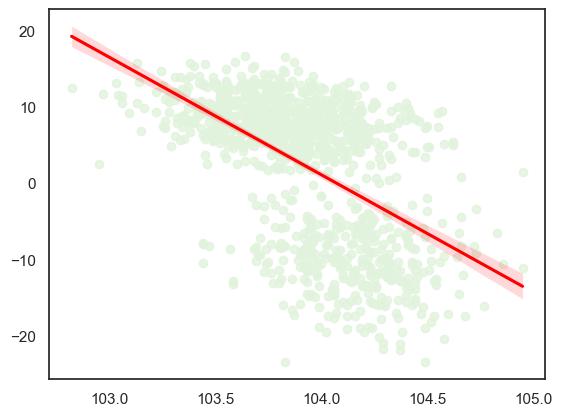

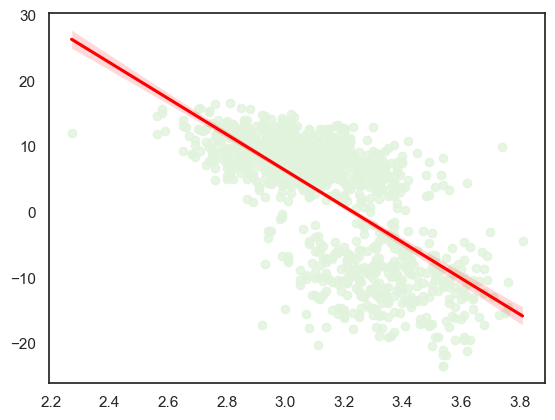

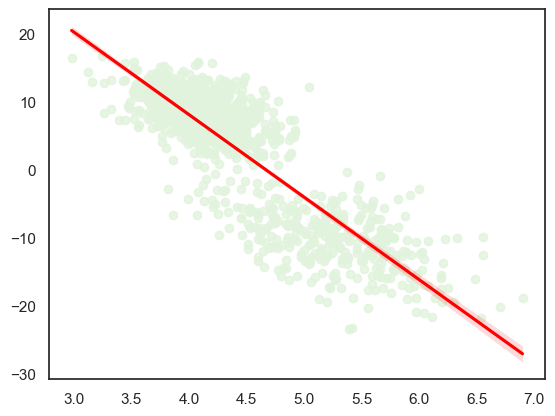

In [74]:
# colinéarité avec height right
sns.regplot(x=X_training['height_right'].values, y=log_odds, line_kws={'color': 'red'})
plt.show()
# colinéarité avec margin up
sns.regplot(x=X_training['margin_up'].values, y=log_odds, line_kws={'color': 'red'})
plt.show()
# colinéarité avec margin low
sns.regplot(x=X_training['margin_low'].values, y=log_odds, line_kws={'color': 'red'})
plt.show()
# colinéarité avec lenght
#sns.regplot(x=X_training['lenght'].values, y=log_odds, line_kws={'color': 'red'})
#plt.show()

Visuellement, la relation entre les variables est bien linéaire, validation de H0.

- ##### Hypothèse 2 : Les variables explicatives ne sont pas fortement corrélées


Le Variance Inflation Factor est un indicateur de corrélation entre les variables explicatives. Plus le VIF est élevé, plus il y a de chance que des variables explicatives soient fortement corrélées entre elles. Une valeur VIF supérieure à 5 est considérée comme un signe de colinéarité.
- H0 : pas de corrélation
- H1 : corrélation

In [75]:
#Variance Inflation Factor
variables_vif = modele_logi.model.exog
vif = [variance_inflation_factor(variables_vif, i) 
       for i in range(1,variables_vif.shape[1])]
print(vif)

[1.246389547387827, 1.8605699267606424, 1.421997270253862, 2.168030027547442]


Les valeurs VIF obtenues indiquent que les variables explicatives n'ont pas une forte corrélation et ne sont pas colinéaires. Une valeur VIF inférieure à 5 est considérée comme indiquant une faible colinéarité et un modèle satisfaisant en termes d'exactitude prédictive. Validation de H0.

- ##### Hypothèse 3 : La variable dépendante est binaire


La vérification de la binarité d'une variable peut être effectuée en vérifiant que la variable ne prend que deux valeurs distinctes. 
H0 : la variable est binaire
H1 : la variable est non binaire

In [76]:
if len(y_training.unique()) == 2:
    print("La binarité est vérifiée")
else:
    print("La binarité n'est pas vérifiée")

La binarité est vérifiée


Validation de H0 : la variable est binaire.

- ##### Hypothèse 4 : Il n'y a pas de données excessives ou aberrantes

Le test le plus courant pour vérifier qu'il n'y a pas de valeurs extrêmes ou aberrantes dans une régression logistique est le test de Cook. 
- H0 : pas de valeurs extremes ou aberrantes
- H1 : présence de valeurs extremes ou aberrantes

In [77]:
# Obtenir les mesures d'influence
#influence = modele_logi.get_influence()

# Obtenir un df qui récapitule les mesures d'influence
#summ_df = influence.summary_frame()

# On filtre sur la distance de Cook
#diagnosis_df = summ_df.loc[:,['cooks_d']]

# On ajoute les valeurs résiduelles normalisées absolues
#diagnosis_df['std_resid'] = st.zscore(modele_logi.resid_pearson)
#diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

# On tri par distance de Cook
#diagnosis_df.sort_values("cooks_d", ascending=False)



- ##### Hypothèse 5 : Les résidus de la régression linéaire sont indépendants


#### <font color='mediumturquoise'> 3) Evaluation et prédictions du modèle </font>

Création d'un tableau qui associe à chaque seuil (score de similarité) une analyse complète (spécificité, sensibilité, accuracy et AUC). Il permet ensuite de trouver le seuil optimal, c'est-à-dire celui qui donne les meilleurs résultats à partir de l'AUC.
L'AUC (Area Under the Curve) est une mesure d'évaluation de la performance d'un modèle de classification binaire. Cette mesure est utilisée pour évaluer à quel point le modèle peut distinguer entre les classes positives et négatives. Plus l'AUC est élevée, meilleure est la capacité du modèle à détecter les classes correctement.

In [78]:
# Ajoutez une constante
X_test = sm.add_constant(X_test)

# Prédictions test set
predictions_test = modele_logi.predict(X_test)

# création table de seuils
thresholds_table = []
roc_auc_scores = []

for threshold in np.arange(0, 1.1, 0.1):
    predictions_test_class = [1 if x > threshold else 0 for x in predictions_test]
    confusion_mat_test = confusion_matrix(y_test, predictions_test_class)
    tn, fp, fn, tp = confusion_mat_test.ravel()
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    roc_auc_scores.append(roc_auc_score(y_test, predictions_test_class))
    thresholds_table.append([threshold, roc_auc_scores[-1], specificity, sensitivity, accuracy])

# Trouver le seuil optimal à deux décimales
optimal_index = np.argmax([i[1] for i in thresholds_table])
optimal_threshold = thresholds_table[optimal_index][0]

# Afficher le tableau
print(tabulate(thresholds_table, headers=['Seuil', 'AUC', 'Spécificité', 'Sensibilité', 'Accuracy']))
# Afficher le seuil optimal
print("\n")
print('------------------------------------------')
print("Le seuil optimal est: {:.2f}".format(optimal_threshold))

  Seuil       AUC    Spécificité    Sensibilité    Accuracy
-------  --------  -------------  -------------  ----------
    0    0.5            0              1           0.642222
    0.1  0.97205        0.944099       1           0.98
    0.2  0.981366       0.962733       1           0.986667
    0.3  0.981366       0.962733       1           0.986667
    0.4  0.984472       0.968944       1           0.988889
    0.5  0.987578       0.975155       1           0.991111
    0.6  0.993434       0.993789       0.99308     0.993333
    0.7  0.99654        1              0.99308     0.995556
    0.8  0.991349       1              0.982699    0.988889
    0.9  0.987889       1              0.975779    0.984444
    1    0.5            1              0           0.357778


------------------------------------------
Le seuil optimal est: 0.70


Le modèle de classification binaire testé s'est avéré très performant, avec un AUC de 0,99654, une spécificité de 1, une sensibilité de 0,99308 et une précision de 0,995556. Les résultats montrent que le seuil optimal est de 0,7 et que le modèle sera capable de détecter avec précision les classes positives et négatives.

- #### Courbe ROC

La courbe ROC (Receiver Operating Characteristic) est un graphique qui permet de visualiser et d'évaluer la performance d'un classificateur binaire. Il permet de trouver le point d'équilibre entre les faux positifs et les faux négatifs d'un modèle de classification. La courbe ROC est encore plus utile quand elle est associée à l'AUC (Area Under the Curve), qui est une mesure permettant de quantifier le niveau de performance du classificateur avec la courbe ROC. L'AUC est calculée en comparant le degré de précision de nos prédictions par rapport à la vraie classification. Plus l'AUC est élevée, meilleure est la capacité d'un modèle à distinguer entre les classes positives et négatives.

Text(0.5, 1.0, 'Courbe ROC')

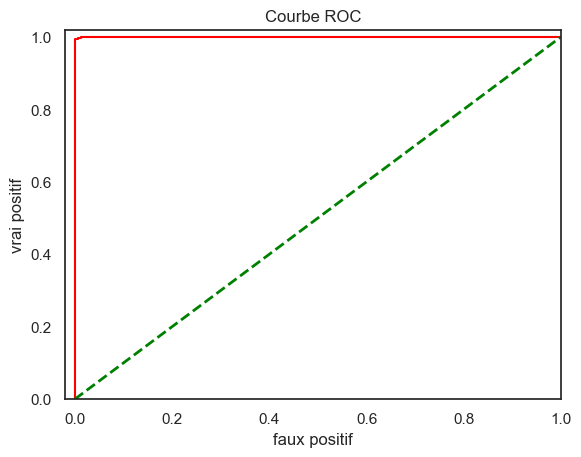

In [79]:
# Définition du seuil
threshold = 0.7
# Classification en fonction du seuil
predictions_test_class = [1 if x > threshold else 0 for x in predictions_test]

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions_test)

# Calcul de l'AUC-ROC
auc_score = roc_auc_score(y_test, predictions_test_class)

# Tracer la courbe ROC

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('faux positif')
plt.ylabel('vrai positif')
plt.title('Courbe ROC')


- #### Matrice de confusion


La matrice de confusion est une matrice de 2 × 2 qui compare les classes prédites par un modèle de classification binaire à la vraie classification des observations, et qui permet de comprendre le niveau de précision d'un modèle. Elle comporte quatre nombres : les vrais positifs, les faux positifs, les faux négatifs et les vrais négatifs. La matrice de confusion peut être utilisée pour calculer des métriques comme l'accuracy, la sensibilité et la spécificité d'un modèle.

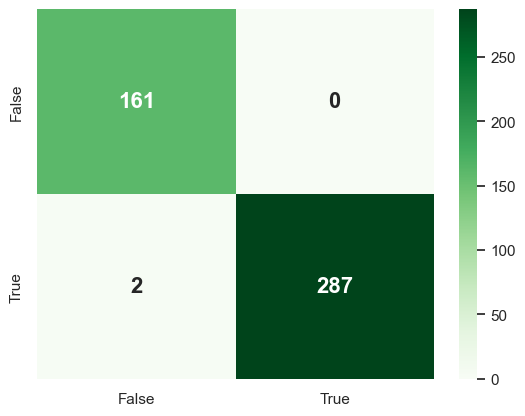

In [80]:
#matrice de confusion
matrice_confusion = confusion_matrix(y_test, predictions_test_class)
sns.heatmap(matrice_confusion,annot=True,fmt='',xticklabels = ["False","True"],yticklabels=["False","True"],cmap='Greens',annot_kws={"size": 16, "weight": "bold"})
plt.show()
#prédictions en abscisse, réalité en ordonnée

La matrice de confusion se compose de quatre régions distinctes : les vrais positifs, les vrais négatifs, les faux positifs et les faux négatifs. La force du modèle se détermine par son taux de vrais positifs et de vrais négatifs.

In [81]:
# Récupération des valeurs de la matrice de confusion
tn, fp, fn, tp = matrice_confusion.ravel()
# Calcul de l'accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
# Calcul de la sensibilité
sensibilite = tp / (tp + fn)
# Calcul de la spécificité
specificite = tn / (tn + fp)

print('------------------------------------------')
print("Précision :", accuracy.round(4))
print("Sensibilité :", sensibilite.round(4))
print("Spécificité :", specificite.round(4))
print("AUC :", auc_score.round(4))

------------------------------------------
Précision : 0.9956
Sensibilité : 0.9931
Spécificité : 1.0
AUC : 0.9965


Ces résultats indiquent que le modèle a un niveau de précision très élevé. L'accuracy est de 0,9956, ce qui signifie que le modèle a réussi à prédire avec précision 99,56% des observations. Les autres scores de performance (sensibilité, spécificité et AUC) sont tous très élevés, ce qui indique que le modèle est très précis dans la détection des classes positives et négatives.

## <font color='skyblue'> 2) Méthode des ensembles </font>


#### <font color='mediumturquoise'> 1) Arbre de décision </font>


L'arbre de décision est représenté sous forme de schéma hiérarchique qui repose sur des décisions basées sur des données. L'arbre de décision analyse les données fournies et crée des sections qui lui permettent de prendre des décisions, ce qui permet de prédire les variables cibles.

In [82]:
# Importer les librairies nécessaires
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Instancier et entrainer un arbre de décision
clf = DecisionTreeClassifier()
clf.fit(X_training, y_training)

# Prédictions à partir des données de test
predictions_test = clf.predict(X_test)

# Calculer la précision du modèle
score = clf.score(X_test, y_test)
print("La précision du modèle est : {}".format(score))

La précision du modèle est : 0.98


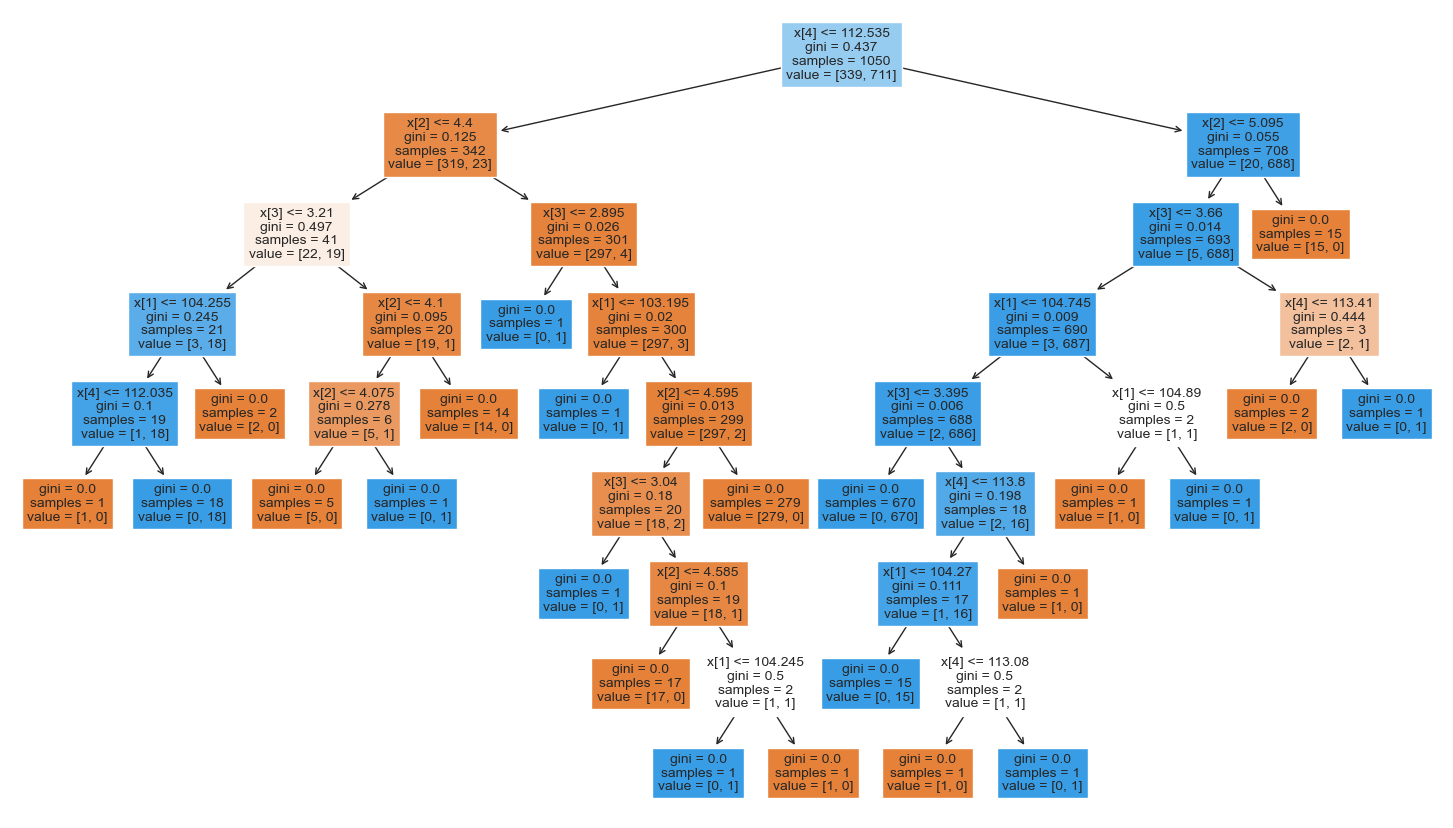

In [83]:

# Importer la librairie neccessaire
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Tracer l'arbre
fig = plt.figure()
plot_tree(clf, filled=True, fontsize=10)
fig.set_size_inches(18.5, 10.5)
plt.show()

- #### Courbe ROC

Text(0.5, 1.0, 'Courbe ROC')

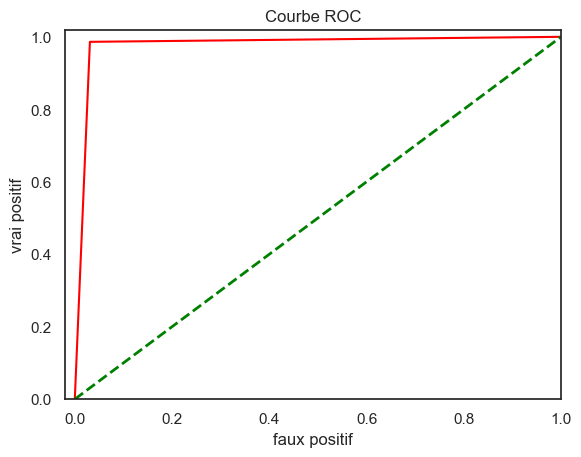

In [84]:
# Définition du seuil
threshold = 0.7
# Classification en fonction du seuil
predictions_test_class = [1 if x > threshold else 0 for x in predictions_test]

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions_test)

# Calcul de l'AUC-ROC
auc_score = roc_auc_score(y_test, predictions_test_class)

# Tracer la courbe ROC

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('faux positif')
plt.ylabel('vrai positif')
plt.title('Courbe ROC')


La courbe ROC est tracée en plaçant la taux de vrais positifs (Taux de valeurs bien prédites positives) sur l'axe Y et le taux de faux positifs (Taux de valeurs fausses positives) sur l'axe X. Un modèle dont la prédiction est plus précise se rapproche du coin supérieur gauche, où le taux de vrais positifs et le taux de faux positifs sont les plus élevés.

- #### Matrice de confusion

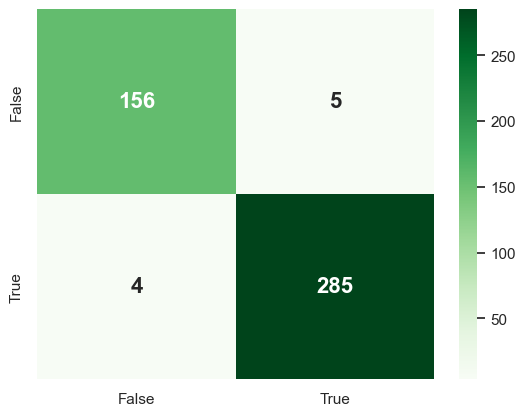

In [85]:
#matrice de confusion
matrice_confusion = confusion_matrix(y_test, predictions_test_class)
sns.heatmap(matrice_confusion,annot=True,fmt='',xticklabels = ["False","True"],yticklabels=["False","True"],cmap='Greens',annot_kws={"size": 16, "weight": "bold"})
plt.show()
#prédictions en abscisse, réalité en ordonnée

La matrice de confusion se compose de quatre régions distinctes : les vrais positifs, les vrais négatifs, les faux positifs et les faux négatifs. La force du modèle se détermine par son taux de vrais positifs et de vrais négatifs.

#### <font color='mediumturquoise'> 2) Random forest </font>

Le random forest (forêt aléatoire) est un algorithme de machine learning utilisé pour résoudre des problèmes de classification et de régression. Il est construit à partir d'un grand nombre d'arbres de décision qui sont entraînés sur des sous-ensembles aléatoires de caractéristiques d'entrée. Les arbres de décision sont ensuite associés pour former un modèle de prédiction, qui peut être utilisé pour effectuer des prédictions et des classifications. 

In [86]:
# Importer les librairies nécessaires
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Instancier et entrainer une forêt aléatoire
clf = RandomForestClassifier()
clf.fit(X_training, y_training)

# Prédictions à partir des données de test
predictions_test = clf.predict(X_test)

# Calculer la précision du modèle
score = clf.score(X_test, y_test)
print("La précision du modèle est : {}".format(score))

La précision du modèle est : 0.9888888888888889


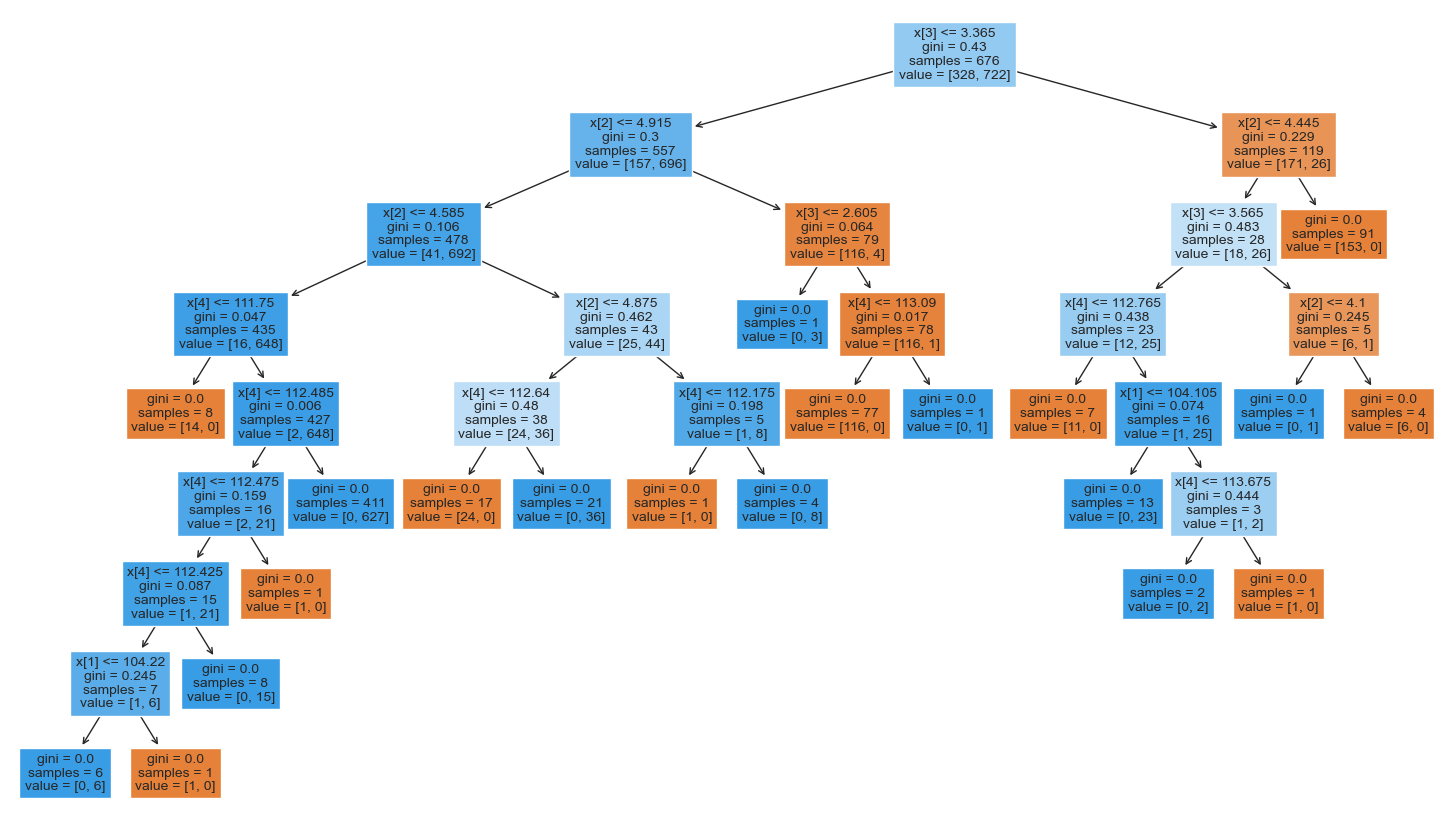

In [87]:
# Importer la librairie neccessaire
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Tracer l'arbre
fig = plt.figure()
plot_tree(clf.estimators_[0], filled=True, fontsize=10)
fig.set_size_inches(18.5, 10.5)
plt.show()

- #### Courbe ROC

Text(0.5, 1.0, 'Courbe ROC')

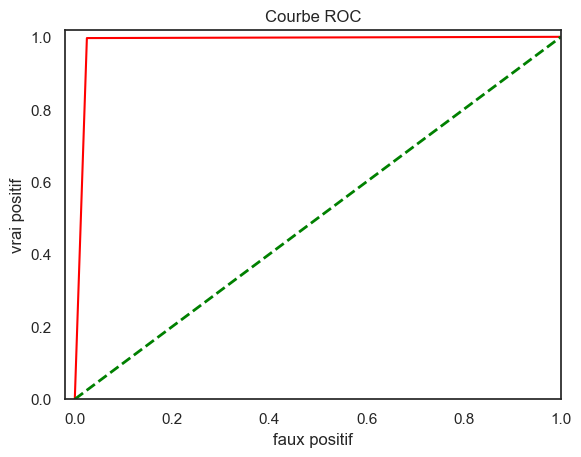

In [88]:
# Définition du seuil
threshold = 0.7
# Classification en fonction du seuil
predictions_test_class = [1 if x > threshold else 0 for x in predictions_test]

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions_test)

# Calcul de l'AUC-ROC
auc_score = roc_auc_score(y_test, predictions_test_class)

# Tracer la courbe ROC

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('faux positif')
plt.ylabel('vrai positif')
plt.title('Courbe ROC')


Ce modèle dont la prédiction est plus précise se rapproche du coin supérieur gauche, où le taux de vrais positifs et le taux de faux positifs sont les plus élevés.

- #### Matrice de confusion

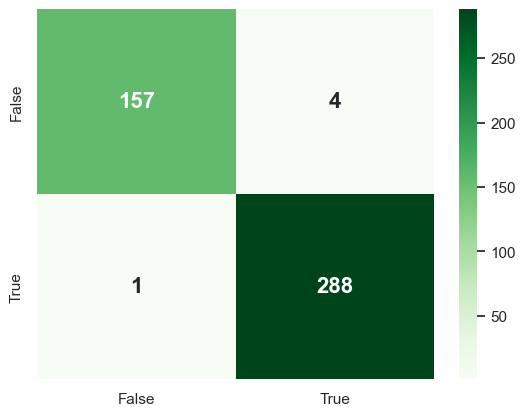

In [89]:
#matrice de confusion
matrice_confusion = confusion_matrix(y_test, predictions_test_class)
sns.heatmap(matrice_confusion,annot=True,fmt='',xticklabels = ["False","True"],yticklabels=["False","True"],cmap='Greens',annot_kws={"size": 16, "weight": "bold"})
plt.show()
#prédictions en abscisse, réalité en ordonnée

La force du modèle se détermine par son taux de vrais positifs et de vrais négatifs.

## <font color='skyblue'> 3) Régression logistique par pipeline </font>


Un pipeline Python est une séquence d'étapes qui permet d'exécuter des tâches consécutives et de produire un résultat. Il est couramment utilisé en apprentissage automatique pour appliquer plusieurs algorithmes et procédures aux jeux de données. Les étapes du pipeline peuvent inclure la préparation des données, l'ajustement des modèles et l'évaluation des performances.

In [90]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Sélection des données et des variables
X = billets.drop(['is_genuine'], axis=1)
y = billets.is_genuine

# Mise en place du pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())

# Entraînement et test
pipe.fit(X, y)

# Prédiction
predictions = pipe.predict(X) 

- #### Courbe ROC

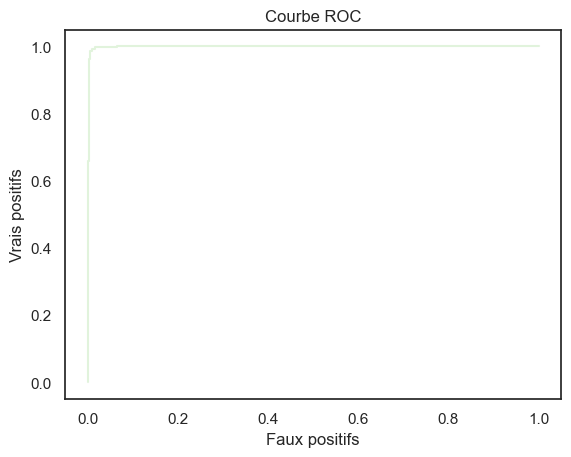

In [91]:
from sklearn.metrics import roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Génération des scores
score = pipe.decision_function(X)

# Génération de la courbe ROC
fpr, tpr, thres = roc_curve(y, score)
plt.plot(fpr, tpr)
plt.title('Courbe ROC')
plt.xlabel('Faux positifs')
plt.ylabel('Vrais positifs')
plt.show()



La courbe ROC s'approche du coin supérieur gauche, elle indique donc une grande précision du modèle.

- #### Matrice de confusion

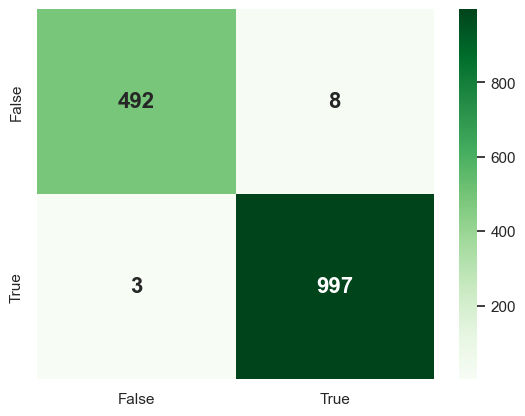

In [92]:
#matrice de confusion
matrice_confusion = confusion_matrix(y, predictions)
sns.heatmap(matrice_confusion,annot=True,fmt='',xticklabels = ["False","True"],yticklabels=["False","True"],cmap='Greens',annot_kws={"size": 16, "weight": "bold"})
plt.show()
#prédictions en abscisse, réalité en ordonnée

Cette matrice de confusion montre qu'il y a 492+997=1489 échantillons qui ont été correctement classés (True Positive et True Negative). Il y a 8 faux positifs et 3 faux négatifs.

# <a name="C4"> E) Evaluation et test des modèles </a>
***


Le test des modèles de régression et de prédiction est un processus qui permet de mesurer la performance des modèles prédictifs conçus au préalable. 

## <font color='skyblue'> 1) Méthode des validations croisées </font>


La validation croisée est une méthode utilisée pour évaluer les performances d'un modèle de machine learning. Elle consiste à diviser les données d'entraînement en plusieurs sous-ensembles, appelés "folds". Chaque sous-ensemble est ensuite utilisé comme données de test et le reste des données sont utilisées pour entraîner le modèle. La validation croisée a pour but de trouver le meilleur modèle à l'aide d'un jeu de données limité et d'améliorer ses performances en l'ajustant à l'aide des données de test.

- #### K-means

In [93]:
# Importer les bibliothèques nécessaires
from sklearn.model_selection import cross_val_score

# Instancier le modèle
KMeanscv = KMeans(n_clusters=3)

# Entraînement du modèle avec une validation croisée
scoreskm = cross_val_score(KMeanscv, X_training, y_training, cv=3)

# Afficher les scores pour chaque itération
print('Itération 1:', scoreskm[0])
print('Itération 2:', scoreskm[1])
print('Itération 3:', scoreskm[2])

# Afficher la moyenne des scores
print('Moyenne des scores:', np.mean(scoreskm))

Itération 1: -141.16655421384442
Itération 2: -145.34702381552836
Itération 3: -155.24818634051744
Moyenne des scores: -147.25392145663008


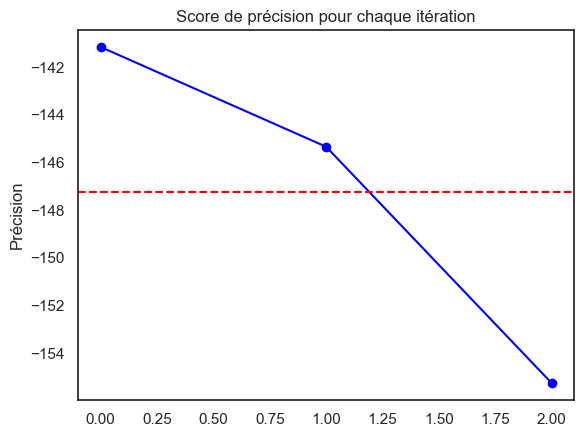

In [94]:
# Afficher la validation croisée
plt.plot(scoreskm, marker='o', color='b')
plt.ylabel('Précision')
plt.title('Score de précision pour chaque itération')

# Afficher la moyenne des scores
plt.axhline(y=np.mean(scoreskm), color='r', linestyle='--')

plt.show()

Les valeurs négatives indiquent que l'algorithme K-Means tente de minimiser la variance au sein du cluster, ce qui est un objectif typique du clustering K-Means. Ces valeurs représentent la distance moyenne des points de données au sein de chaque cluster par rapport à leurs centres de cluster respectifs. Des valeurs inférieures indiquent généralement un meilleur regroupement.


- #### Regression logistique

In [95]:
# Importer les bibliothèques nécessaires
from sklearn.model_selection import cross_val_score

# Instancier un modèle d'arbres de décisions
logistic_regression = LogisticRegression(max_iter=1000)

# Entraînement du modèle avec une validation croisée
scoreslr = cross_val_score(logistic_regression, X_training, y_training, cv=3)

# Afficher les scores pour chaque itération
print('Itération 1:', scoreslr[0])
print('Itération 2:', scoreslr[1])
print('Itération 3:', scoreslr[2])

# Afficher la moyenne des scores
print('Moyenne des scores:', np.mean(scoreslr))

Itération 1: 0.9942857142857143
Itération 2: 0.9828571428571429
Itération 3: 0.9942857142857143
Moyenne des scores: 0.9904761904761905


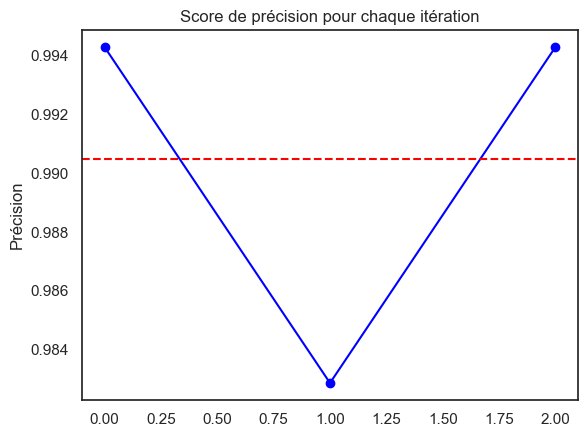

In [96]:
# Afficher la validation croisée
plt.plot(scoreslr, marker='o', color='b')
plt.ylabel('Précision')
plt.title('Score de précision pour chaque itération')

# Afficher la moyenne des scores
plt.axhline(y=np.mean(scoreslr), color='r', linestyle='--')

plt.show()

Les résultats de validation croisée pour le modèle de régression logistique montrent systématiquement une précision élevée, avec un score de précision moyen d'environ 99,05 %, ce qui indique d'excellentes performances dans la classification des points de données.

- Random Forest

In [97]:
# Importer les bibliothèques nécessaires
from sklearn.model_selection import cross_val_score

# Instancier un modèle d'arbres de décisions
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle avec une validation croisée
scoresrf = cross_val_score(rf_class, X_training, y_training, cv=3)

# Afficher les scores pour chaque itération
print('Itération 1:', scoresrf[0])
print('Itération 2:', scoresrf[1])
print('Itération 3:', scoresrf[2])

# Afficher la moyenne des scores
print('Moyenne des scores:', np.mean(scoresrf))

Itération 1: 0.9942857142857143
Itération 2: 0.9885714285714285
Itération 3: 0.9914285714285714
Moyenne des scores: 0.9914285714285714


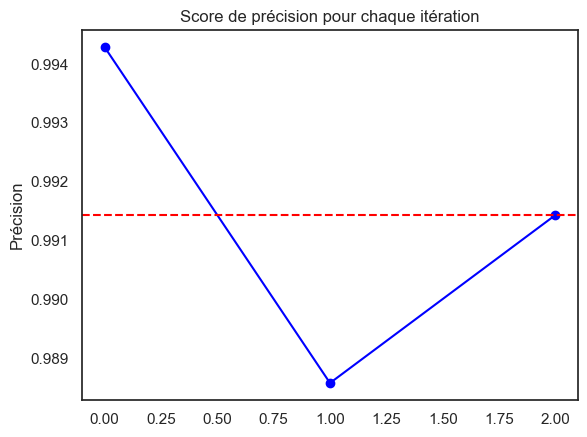

In [98]:
# Afficher la validation croisée
plt.plot(scoresrf, marker='o', color='b')
plt.ylabel('Précision')
plt.title('Score de précision pour chaque itération')

# Afficher la moyenne des scores
plt.axhline(y=np.mean(scoresrf), color='r', linestyle='--')

plt.show()

Ces résultats indiquent le score obtenu pour chaque itération de la validation croisée. Une plus grande moyenne de scores indique que le modèle est plus précis et donc plus fiable. Ces résultats indiquent que le modèle d'arbres de décision prédit correctement les données d'entraînement avec une précision globale de 99,14%.

Pour cela, création d'un dataframe comprenant 15 billets, 10 authentiques et 5 contrefaits.

In [99]:
# créer des sous-ensembles par catégorie
vrai_subset = billets.iloc[0:10]
faux_subset = billets.iloc[1494:1499]

# concaténer les ensembles antérieurs 
echantillon_test = pd.concat([vrai_subset, faux_subset])
echantillon_test
echantillon_test.drop(columns="is_genuine",inplace=True)

# vérifier la taille du dataframe réduit
echantillon_test

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
5,172.17,103.74,104.08,4.42,2.95,112.81
6,172.34,104.18,103.85,4.58,3.26,112.81
7,171.88,103.76,104.08,3.98,2.92,113.08
8,172.47,103.92,103.67,4.00,3.25,112.85
9,172.47,104.07,104.02,4.04,3.25,113.45


In [100]:
billets_kmeans_copie.drop("classe_k", axis=1, inplace=True)
billets_kmeans_copie.drop("is_genuine", axis=1, inplace=True)

# Ajout d'une colonne d'ID dans le DataFrame
billets_kmeans_copie["id"] = billets_kmeans_copie.index

# Afficher le DataFrame mis à jour
billets_kmeans_copie

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.81,104.86,104.95,4.52,2.89,112.83,0
1,171.46,103.36,103.66,3.77,2.99,113.09,1
2,172.69,104.48,103.50,4.40,2.94,113.16,2
3,171.36,103.91,103.94,3.62,3.01,113.51,3
4,171.73,104.28,103.46,4.04,3.48,112.54,4
...,...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28,1495
1496,172.19,104.63,104.44,5.27,3.37,110.97,1496
1497,171.80,104.01,104.12,5.51,3.36,111.95,1497
1498,172.06,104.28,104.06,5.17,3.46,112.25,1498


In [101]:
# Prédictions via kmeans
kmeans_prediction = kmeans.predict(billets_kmeans_copie)
kmeans_prediction = np.where(kmeans_prediction == 0, "Vrai", "Faux")

# Listes des billets
authentiques = []
contrefacons = []

# Vérification des billets
for prediction, billet_id in zip(kmeans_prediction, billets_kmeans_copie["id"]):
    if prediction == "Vrai":
        authentiques.append(billet_id)
    else:
        contrefacons.append(billet_id)

# Affichage final
print("Vérification des billets:")
print('------------------------------------------', "\n")
if authentiques:
    print("Les billets authentiques sont :", authentiques)
else:
    print("Aucun billet authentique trouvé.")

if contrefacons:
    print("Les billets contrefaits sont :", contrefacons)
else:
    print("Aucun billet contrefait trouvé.")

Vérification des billets:
------------------------------------------ 

Les billets authentiques sont : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Les billets contrefaits sont : [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,

## <font color='skyblue'> 2) Test de l'échantillon témoin</font>


- #### Importation fichier test

In [106]:
data = pd.read_csv('test_P10.csv')

In [107]:
data.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


- #### Test Regression logistique

In [108]:
X_data = data[["height_right","margin_low","margin_up","length"]]

# Ajout d'une colonne constante
X_data = sm.add_constant(X_data)

# Prédictions à partir du modèle
y_pred_data = modele_logi.predict(X_data)

#Définition du seuil
threshold = 0.7
y_pred_data_class = [1 if x > threshold else 0 for x in y_pred_data]

# Vérification
vrai = [billet_id for prediction, billet_id in zip(y_pred_data_class, data["id"]) if prediction == 1]
faux = [billet_id for prediction, billet_id in zip(y_pred_data_class, data["id"]) if prediction == 0]

if vrai:
    print("Vrais billets :", vrai)
else:
    print("Pas de vrais billets")

if faux:
    print("Faux billets :", faux)
else:
    print("Pas de faux billets")

Vrais billets : ['B_1', 'B_3']
Faux billets : ['B_2', 'B_4', 'B_5']


- #### Test Random Forest

In [109]:
# Instancier et entrainer une random forest
clfrf = RandomForestClassifier()
clfrf.fit(X_training, y_training)

# Prédictions à partir des données echantillon
predictions_test2 = clfrf.predict(X_data)

#diviser les prédictions en réponse binaire
predictions_test2_mapped = np.where(predictions_test2 == 1, "Vrai", "Faux") 

# Vérification
Vrais = [billet_id for prediction, billet_id in zip(predictions_test2_mapped, data["id"]) if prediction == "Vrai"]
Faux = [billet_id for prediction, billet_id in zip(predictions_test2_mapped, data["id"]) if prediction == "Faux"]

if vrai:
    print("Vrais billets :", vrai)
else:
    print("Pas de vrais billets")

if faux:
    print("Faux billets :", faux)
else:
    print("Pas de faux billets")

Vrais billets : ['B_1', 'B_3']
Faux billets : ['B_2', 'B_4', 'B_5']


- #### Test K-means

## <font color='skyblue'> 3) Conclusion </font>



En conclusion, nos modèles de détection automatique de faux billets ont été conçus pour prendre en compte les caractéristiques géométriques des billets et l'évaluation des performances de nos modèles s'est avérée à la fois satisfaisante et prometteuse. Nous avons comparé les résultats obtenus avec la régression logistique classique et le k-means pour assurer la fiabilité des résultats et les matrices de confusion nous ont montré que le modèle était capable d'identifier précisément les faux billets. Sans l'aide de ces outils, nous n'avons aucune certitude que les moyens traditionnels de vérification étaient suffisants pour combattre le faux-monnayage. Par conséquent, notre modèle est un outil essentiel qui contribuera à sécuriser les transactions financières actuelles et à réduire le risque